In [1]:
##import required packages

import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')


### Reading clusterwise labelled data

Note: The classes were predicted by dropping the features with high correlation values and then the predicted labels were added to the original data with all coulumns 

In [2]:
c2=pd.read_csv("../data/Clustering labelled data1/2_cluster.csv").drop(['Unnamed: 0.1','Unnamed: 0'],axis=1).dropna()
c3=pd.read_csv("../data/Clustering labelled data1/3_cluster.csv").drop(['Unnamed: 0.1','Unnamed: 0'],axis=1).dropna()
c4=pd.read_csv("../data/Clustering labelled data1/4_cluster.csv").drop(['Unnamed: 0.1','Unnamed: 0'],axis=1).dropna()
c5=pd.read_csv("../data/Clustering labelled data1/5_cluster.csv").drop(['Unnamed: 0.1','Unnamed: 0'],axis=1).dropna()
c6=pd.read_csv("../data/Clustering labelled data1/6_cluster.csv").drop(['Unnamed: 0.1','Unnamed: 0'],axis=1).dropna()

# Clusters =2
    

In [3]:
c2

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Nonwhite,% households wo car,Number of Hospitals,% disabled,% Without Health Insurance,% Limited English Proficiency,% workers commuting by public transit,% Veterans in Civilian Adult Population,opioid death rate,class
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,...,23.121377,0.056569,1.0,19.3,10.0,0.653564,0.1,12.283,8.992644,0.0
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,...,13.733800,0.035530,4.0,14.0,13.2,1.424538,0.1,11.938,6.421370,0.0
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,...,52.618106,0.092373,1.0,22.2,13.5,1.469628,0.3,7.672,20.095655,0.0
3,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,...,23.345319,0.059283,1.0,16.7,10.6,0.687135,0.5,7.152,22.321429,0.0
4,1009,Alabama,Blount,1085.0,11335.071134,21.745293,4.860808,4.891455,7.604563,19.208672,...,4.494752,0.041373,1.0,14.2,14.1,1.461165,0.1,8.532,8.644537,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,56035,Wyoming,Sublette,97.0,6080.222322,12.237396,3.016854,3.050548,7.852761,13.912994,...,3.748367,0.013763,0.0,12.9,11.9,0.396947,0.3,9.451,50.952818,0.0
3130,56037,Wyoming,Sweetwater,532.0,7831.827655,14.813082,3.402029,3.623554,9.705248,18.073422,...,6.874901,0.023849,2.0,12.3,11.5,2.400605,2.5,8.256,11.614132,1.0
3131,56039,Wyoming,Teton,109.0,2730.603992,11.914358,3.031233,3.180613,7.736721,14.546369,...,9.657834,0.024787,1.0,7.0,13.4,5.033850,4.1,5.283,21.662840,0.0
3132,56041,Wyoming,Uinta,256.0,7330.683549,15.537464,3.628488,3.669805,10.110206,17.212675,...,6.584502,0.039195,2.0,17.2,11.8,0.439560,3.6,7.919,24.631755,0.0


The number of entries per class are:
0.0    2155
1.0     979
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


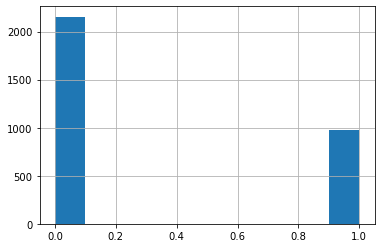

In [4]:
print("The number of entries per class are:\n{}".format(c2['class'].value_counts()),c2['class'].hist())

In [5]:
X1=c2.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c2['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c2[X1.columns[(selector.get_support())]]
print("Top features are\n")
for val in X_red.columns.to_list():
    print(val)

Top features are

Years of Potential Life Lost Rate
Average Number of Mentally Unhealthy Days
% Smokers
% Excessive Drinking
Average Daily PM2.5
% Insufficient Sleep
% Children Uninsured
Average Math Performance
Population
% Without Health Insurance


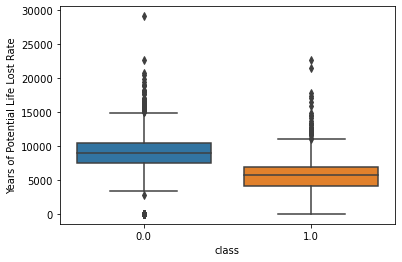

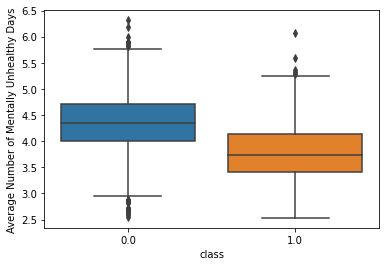

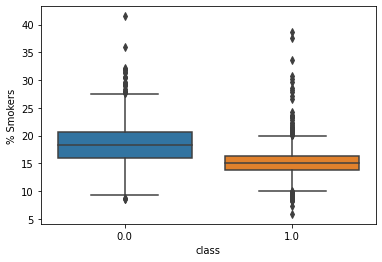

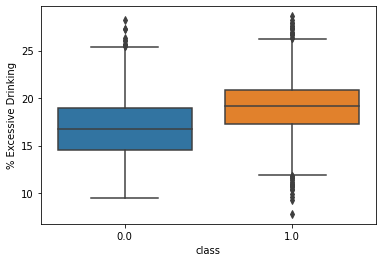

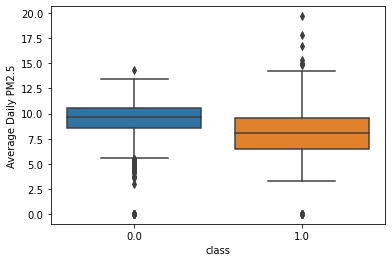

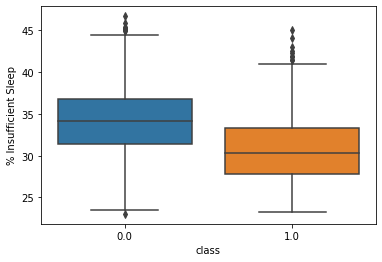

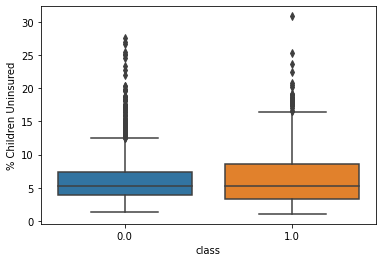

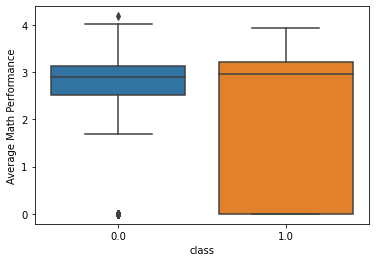

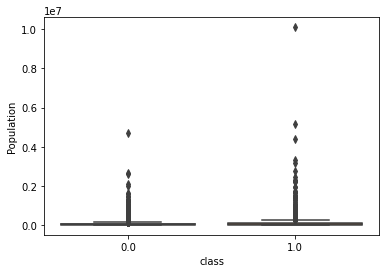

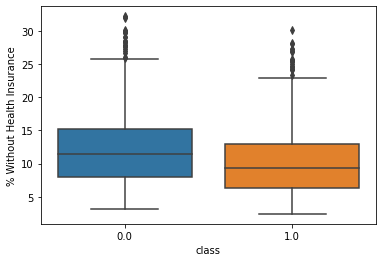

In [6]:
## Boxplots

for i in X_red.columns:
    plt.figure()
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

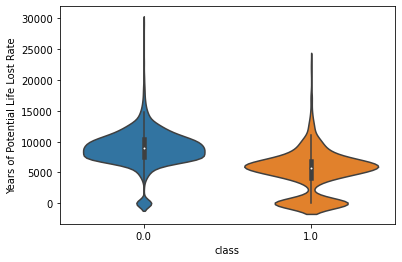

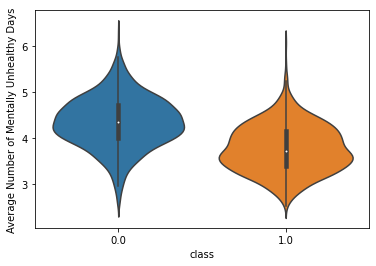

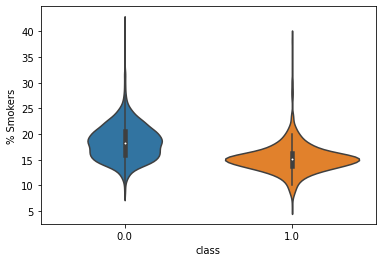

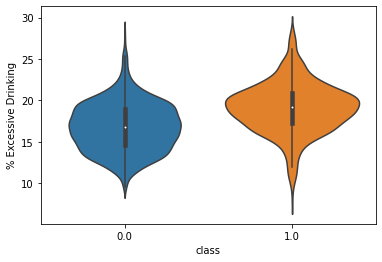

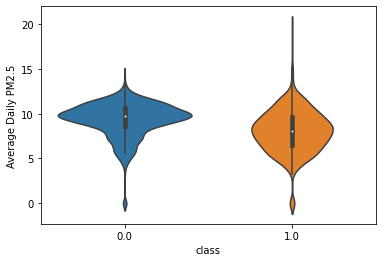

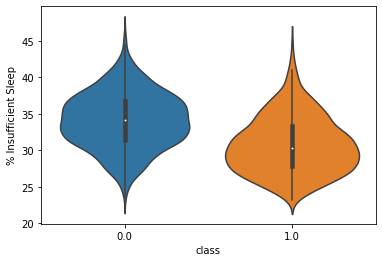

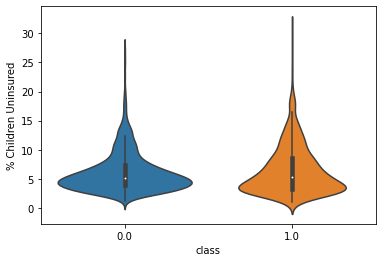

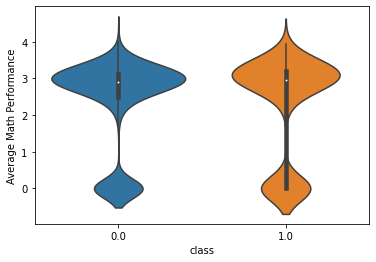

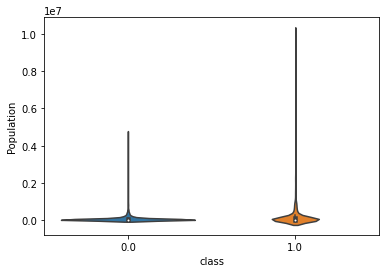

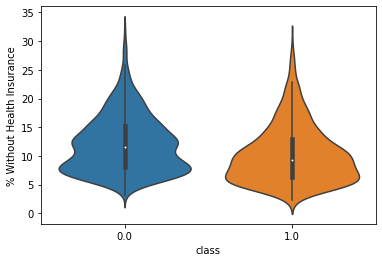

In [7]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st Cluster 

1    2155
0     979
Name: class, dtype: int64
Top features are

Years of Potential Life Lost Rate
% Without Health Insurance
Population
Average Number of Mentally Unhealthy Days
Average Daily PM2.5
% Smokers
Average Math Performance
% Insufficient Sleep
% Children Uninsured
% Excessive Drinking


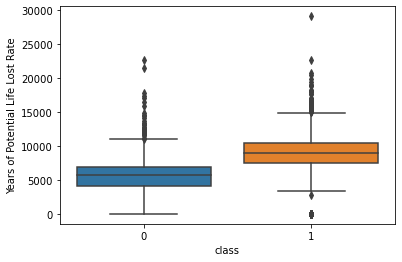

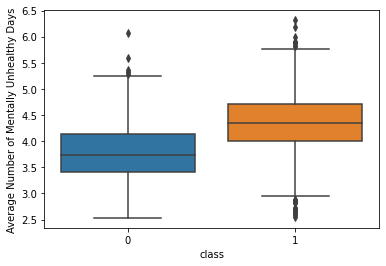

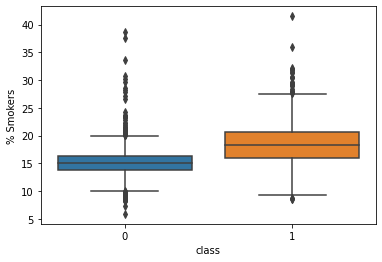

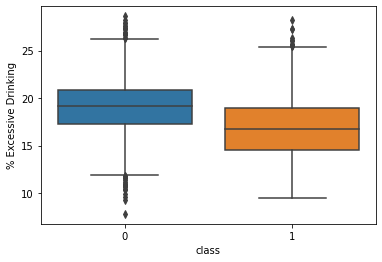

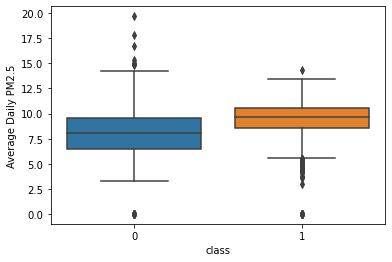

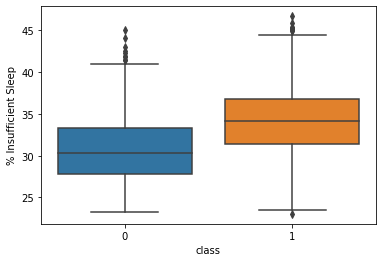

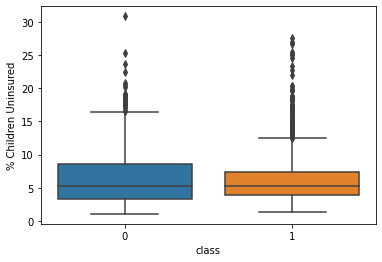

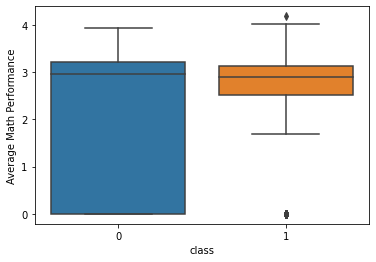

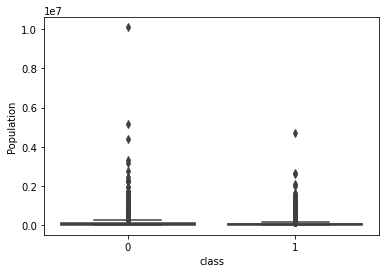

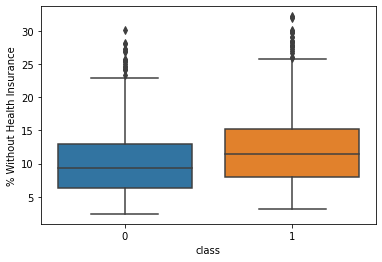

In [8]:
data1=c2[c2['class']==0]
data1_bar=c2[c2['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c21=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c21['class'].value_counts())

X=c21.drop(['class'],axis=1)
y=c21['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c2[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    979
0    979
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% Insufficient Sleep
Drug Overdose Mortality Rate
Population
% Smokers
Average Daily PM2.5
Juvenile Arrest Rate
% Without Health Insurance
% Excessive Drinking


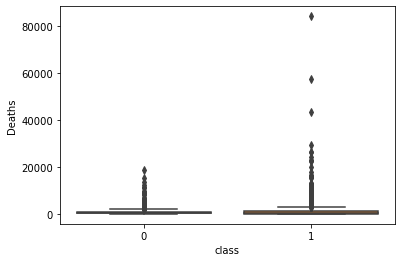

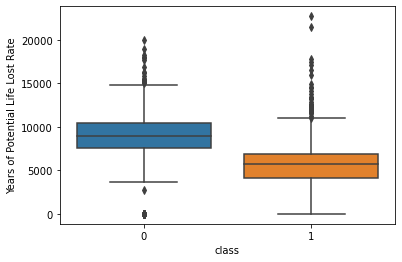

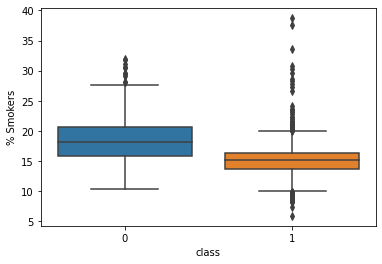

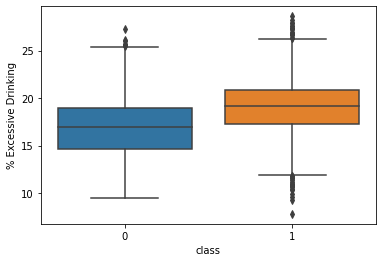

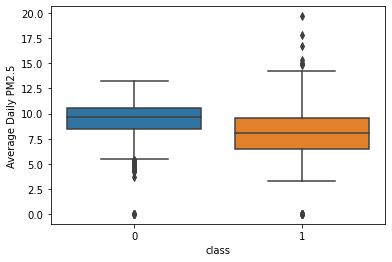

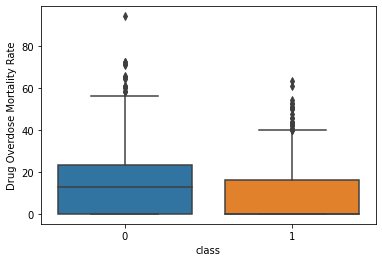

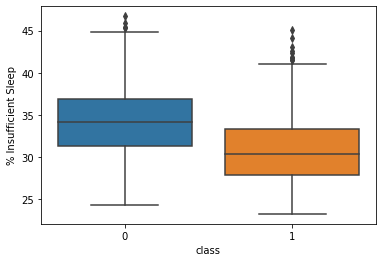

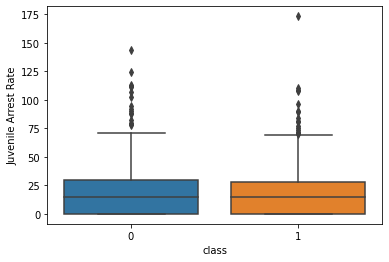

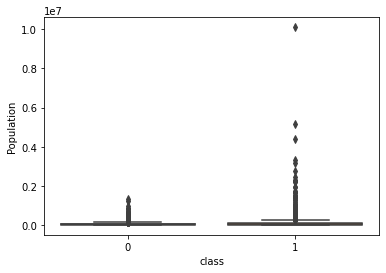

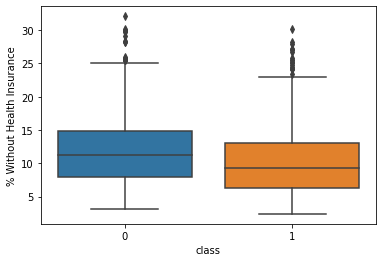

In [9]:
data1=c2[c2['class']==1]
data1_bar=c2[c2['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c22=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c22['class'].value_counts())

X=c22.drop(['class'],axis=1)
y=c22['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c2[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 3


The number of entries per class are:
0    2159
2     907
1      68
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


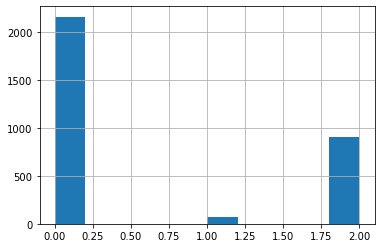

In [10]:
print("The number of entries per class are:\n{}".format(c3['class'].value_counts()),c3['class'].hist())

In [11]:
X1=c3.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c3['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c3[X1.columns[(selector.get_support())]]
print("Top features are\n")
for val in X_red.columns.to_list():
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
Average Number of Physically Unhealthy Days
Average Number of Mentally Unhealthy Days
Average Daily PM2.5
% Insufficient Sleep
% Children Uninsured
Average Math Performance
internet_hhs
% Without Health Insurance


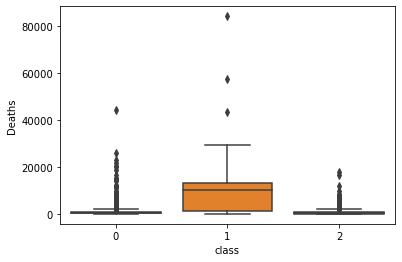

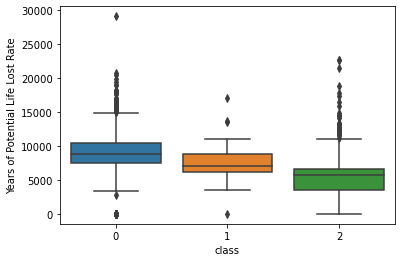

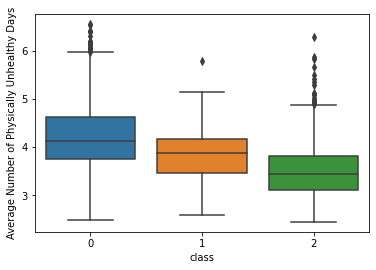

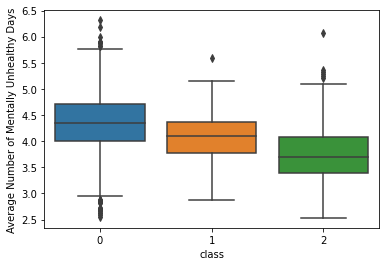

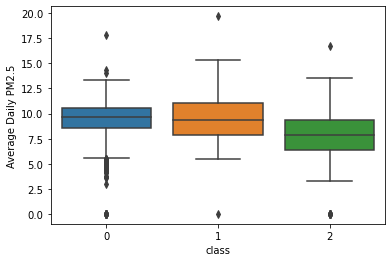

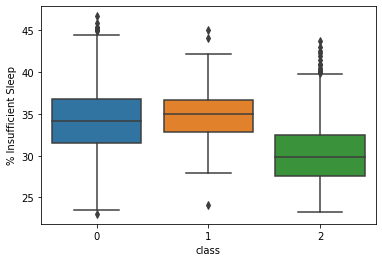

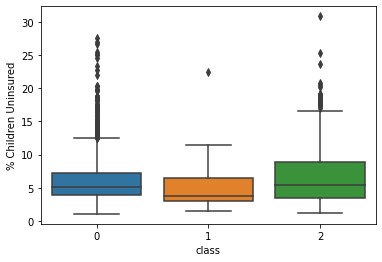

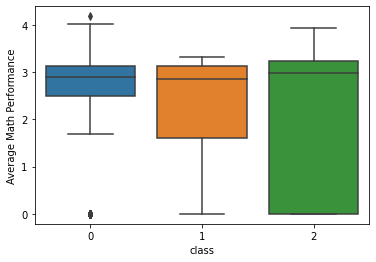

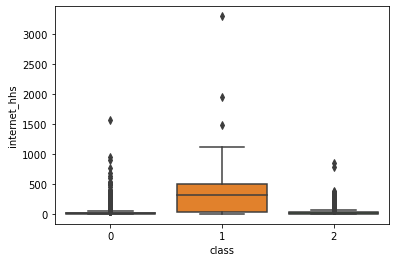

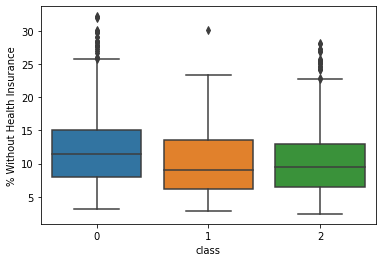

In [12]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

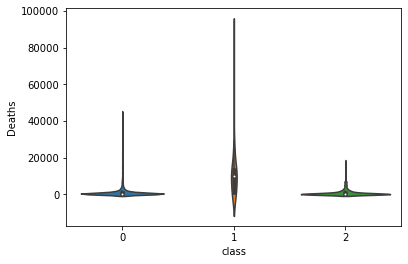

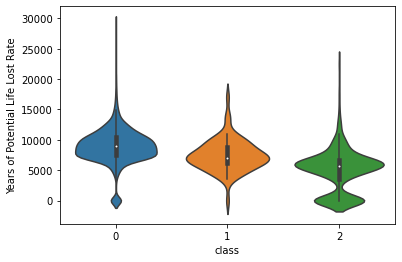

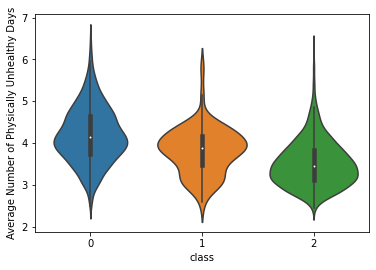

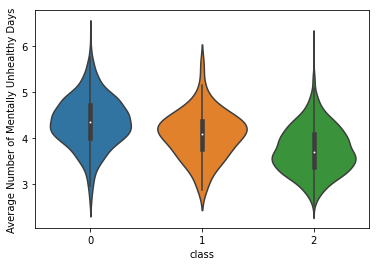

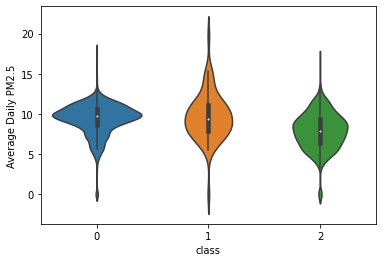

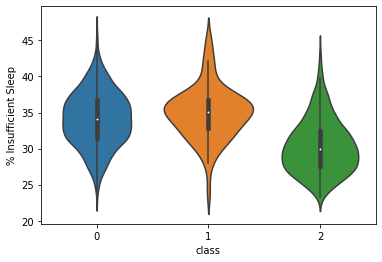

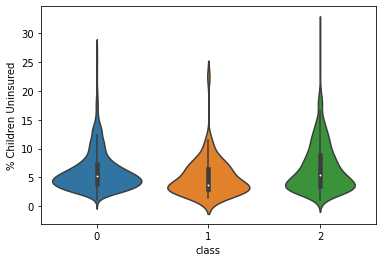

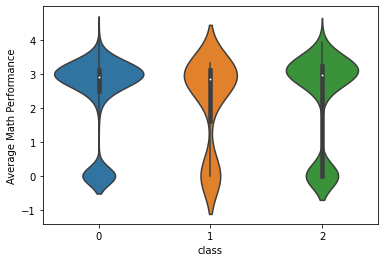

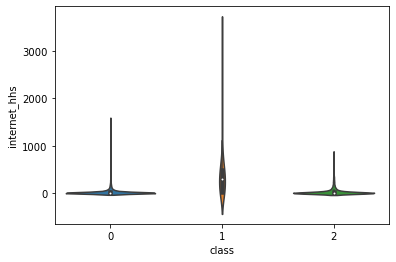

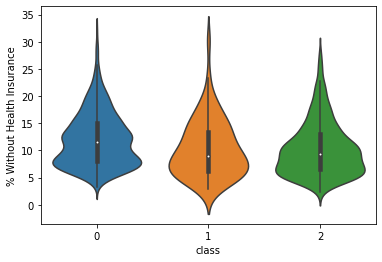

In [13]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    2159
0     975
Name: class, dtype: int64
Top features are

Deaths
% Insufficient Sleep
% Children Uninsured
Average Daily PM2.5
Drug Overdose Mortality Rate
% Without Health Insurance
% Food Insecure
Years of Potential Life Lost Rate
Average Number of Physically Unhealthy Days
Average Number of Mentally Unhealthy Days


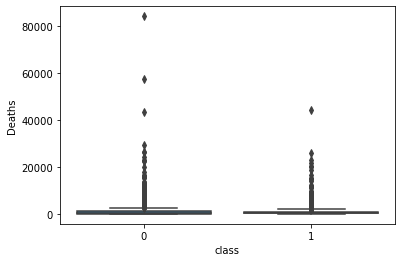

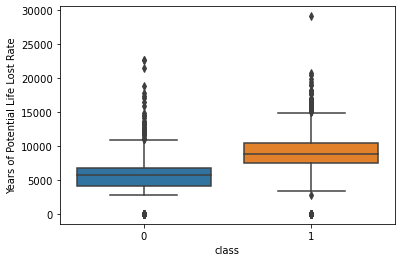

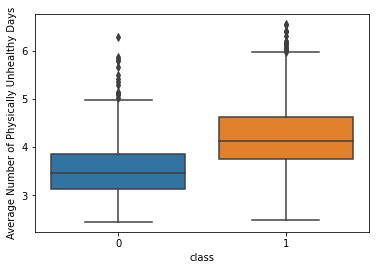

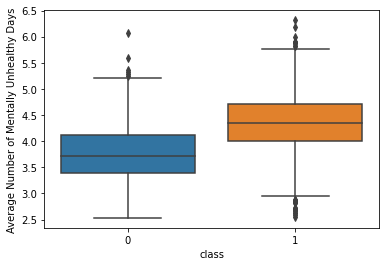

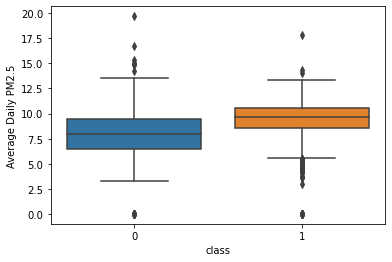

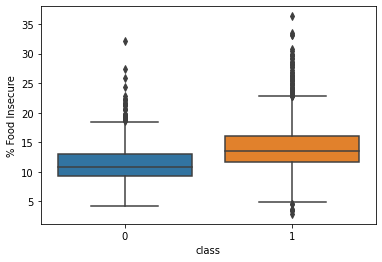

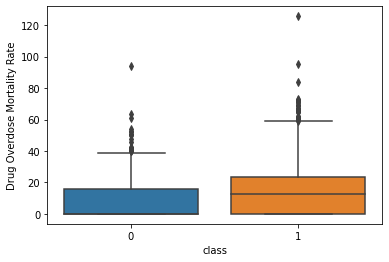

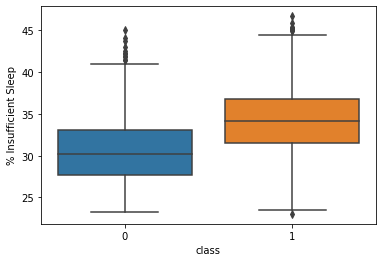

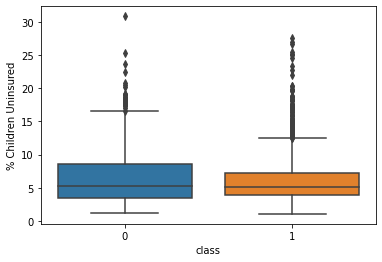

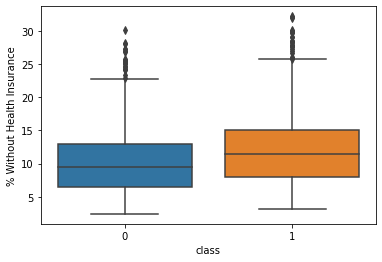

In [14]:
data1=c3[c3['class']==0]
data1_bar=c3[c3['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c31=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c31['class'].value_counts())

X=c31.drop(['class'],axis=1)
y=c31['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    68
0    68
Name: class, dtype: int64
Top features are

Deaths
% Severe Housing Problems
non-White/White Segregation Index
Income Ratio
internet_nonconsumer
% Unemployed
%  Adults with Obesity
% Without Health Insurance
% workers commuting by public transit
% Low Birthweight


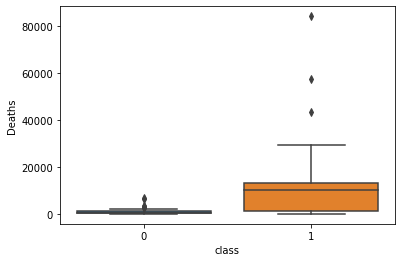

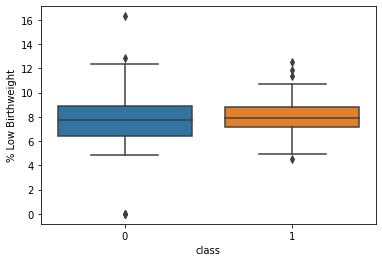

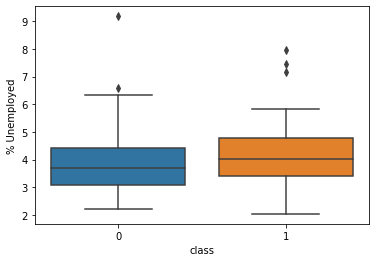

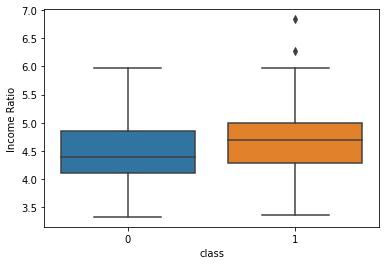

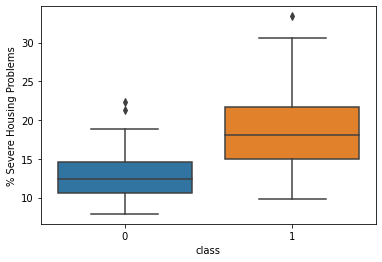

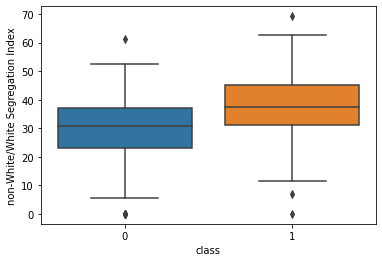

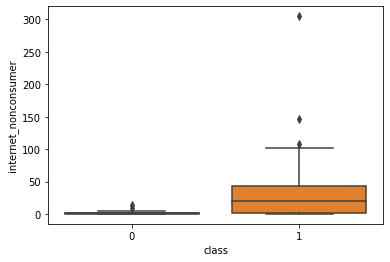

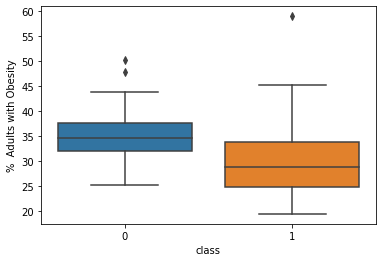

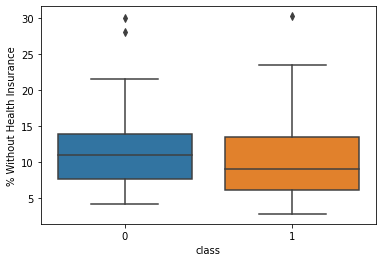

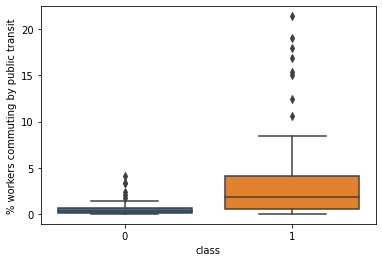

In [15]:
data1=c3[c3['class']==1]
data1_bar=c3[c3['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c32=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c32['class'].value_counts())

X=c32.drop(['class'],axis=1)
y=c32['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    907
0    907
Name: class, dtype: int64
Top features are

Deaths
Violent Crime Rate
Average Daily PM2.5
% Insufficient Sleep
% Children Uninsured
% Excessive Drinking
Juvenile Arrest Rate
Income Ratio
% Without Health Insurance
Years of Potential Life Lost Rate


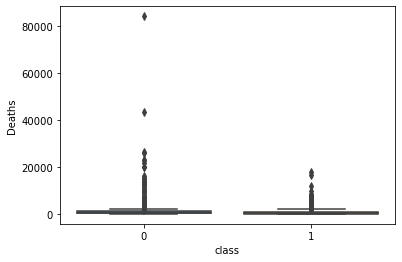

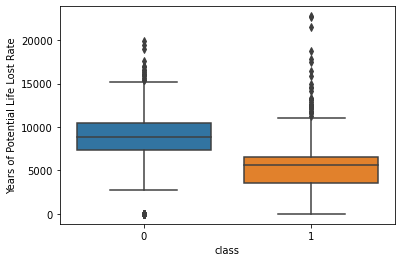

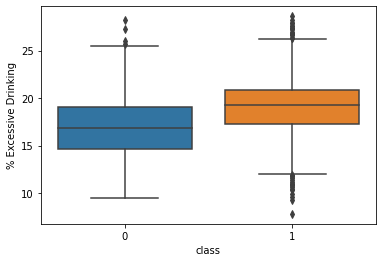

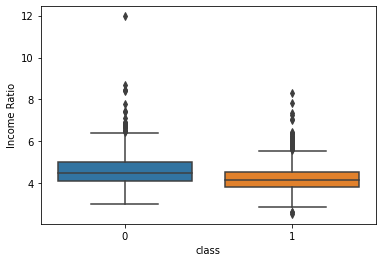

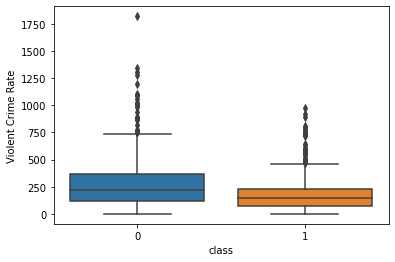

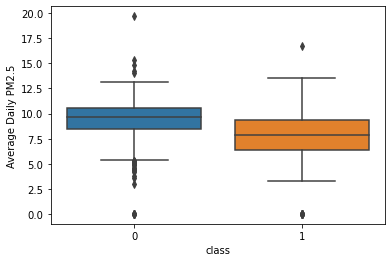

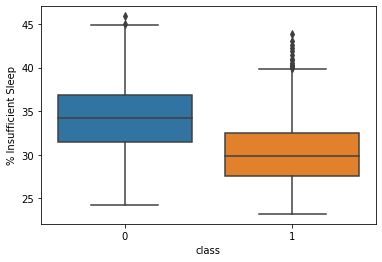

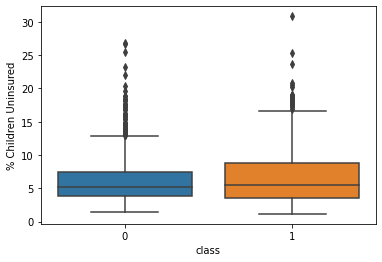

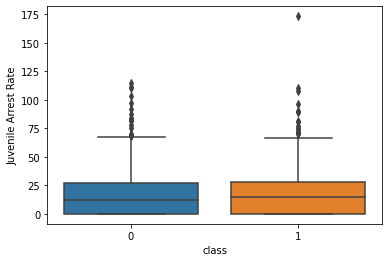

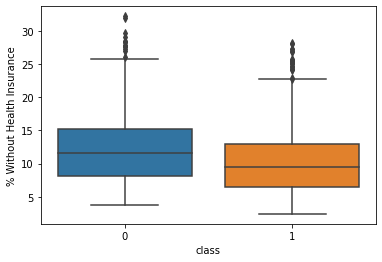

In [16]:
data1=c3[c3['class']==2]
data1_bar=c3[c3['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c33=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c33['class'].value_counts())

X=c33.drop(['class'],axis=1)
y=c33['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c3[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 4


The number of entries per class are:
0    1648
3    1138
1     297
2      51
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


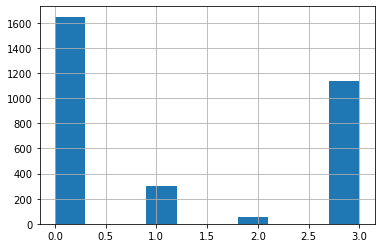

In [17]:
print("The number of entries per class are:\n{}".format(c4['class'].value_counts()),c4['class'].hist())

In [18]:
X1=c4.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c4['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c4[X1.columns[(selector.get_support())]]
print("Top features are\n")
for val in X_red.columns.to_list():
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
% Excessive Drinking
Average Daily PM2.5
Age-Adjusted Death Rate
% Frequent Mental Distress
Drug Overdose Mortality Rate
% Children Uninsured
Juvenile Arrest Rate
internet_hhs


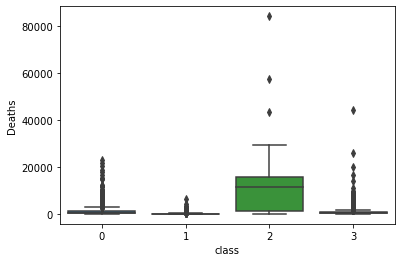

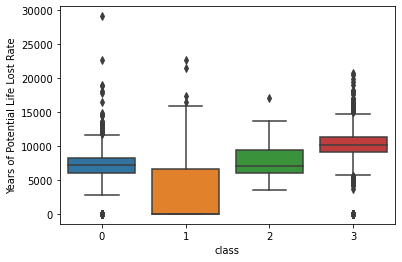

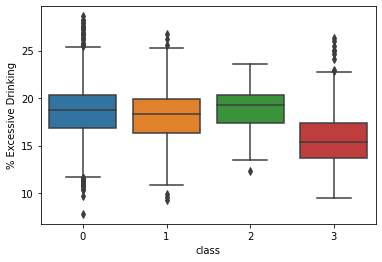

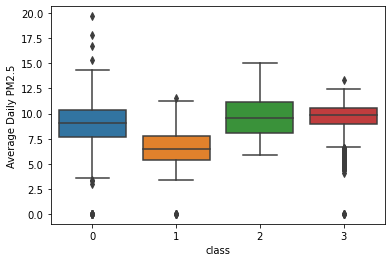

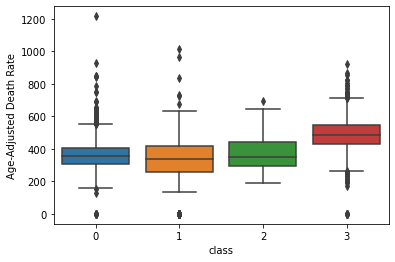

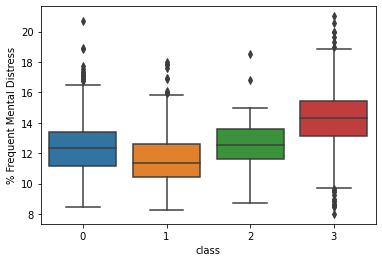

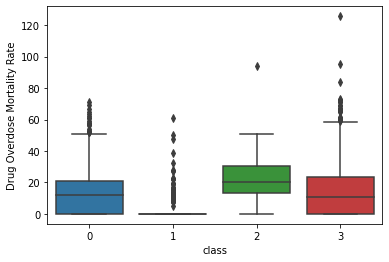

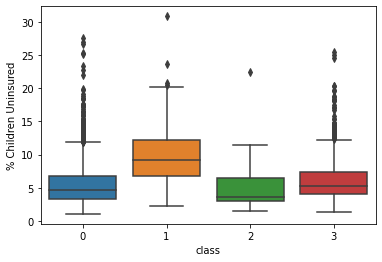

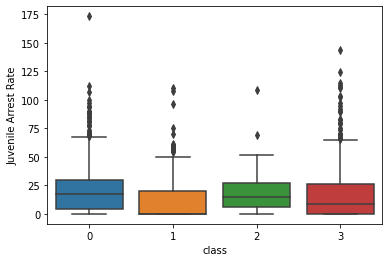

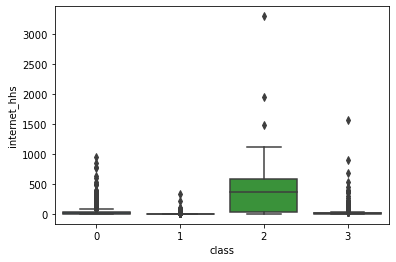

In [19]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

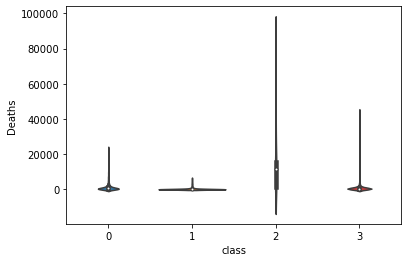

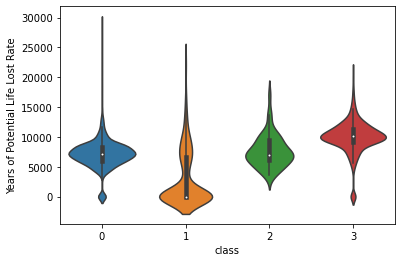

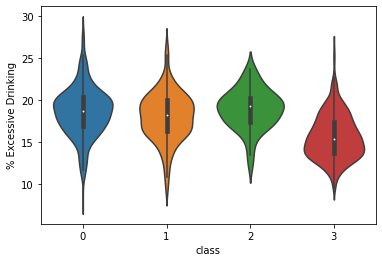

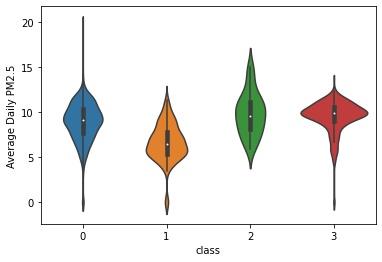

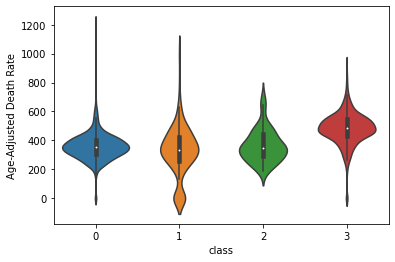

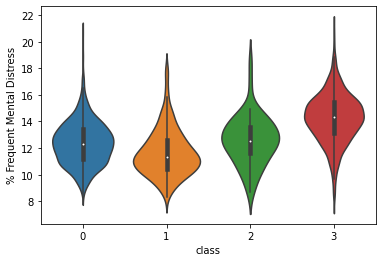

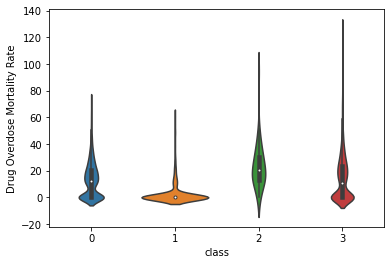

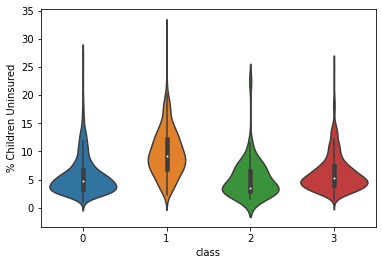

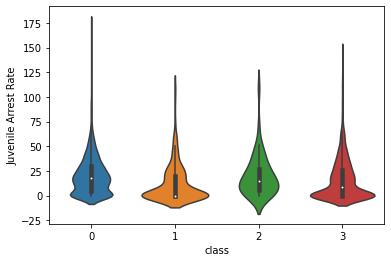

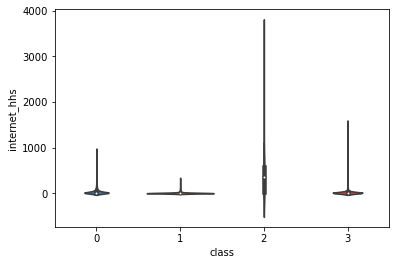

In [20]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1648
0    1486
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% Without Health Insurance
Age-Adjusted Death Rate
Drug Overdose Mortality Rate
% Children Uninsured
Juvenile Arrest Rate
Population
% Frequent Mental Distress
% Excessive Drinking


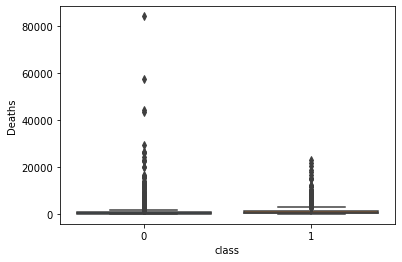

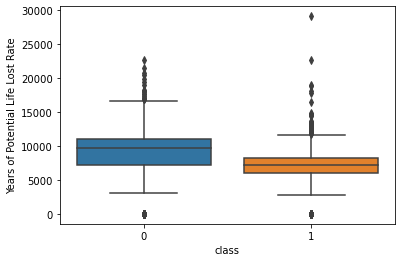

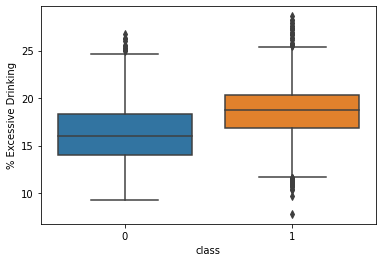

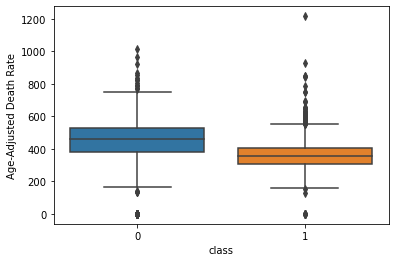

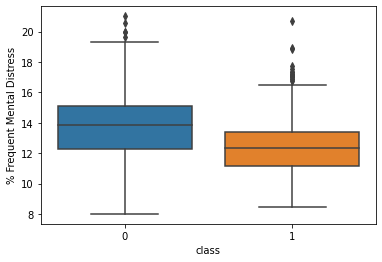

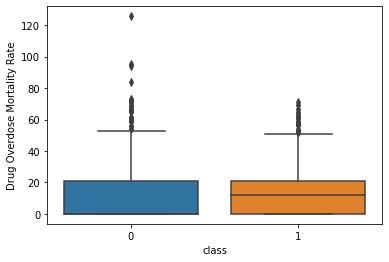

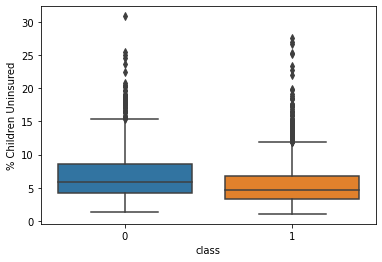

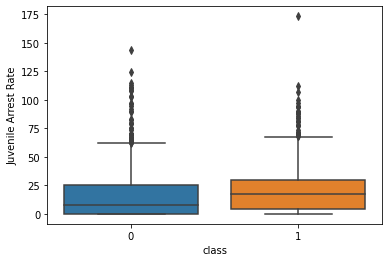

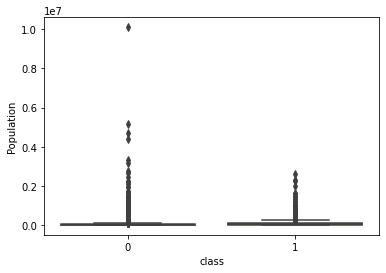

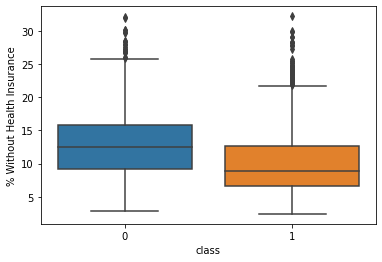

In [21]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c41=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c41['class'].value_counts())



X=c41.drop(['class'],axis=1)
y=c41['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 2nd cluster

1    297
0    297
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
% workers commuting by public transit
covid_cases
% American Indian & Alaska Native
Juvenile Arrest Rate
non-White/White Segregation Index
% Children Uninsured
% Frequent Mental Distress
Average Daily PM2.5


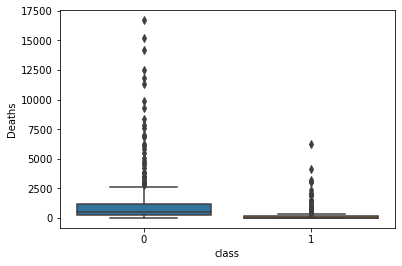

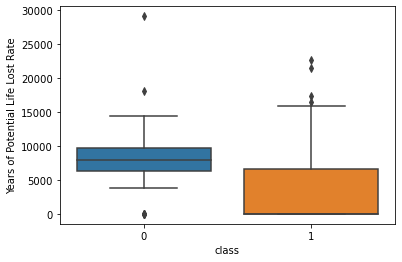

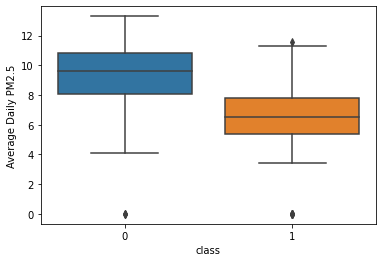

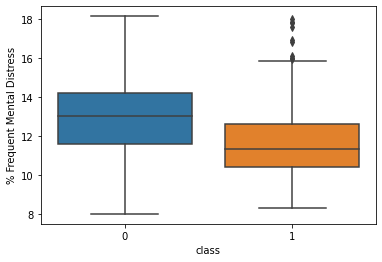

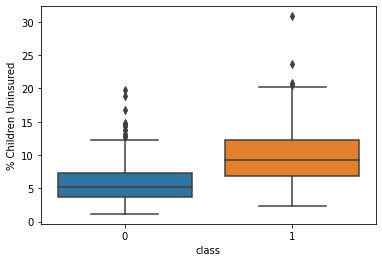

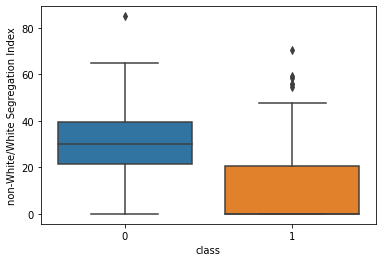

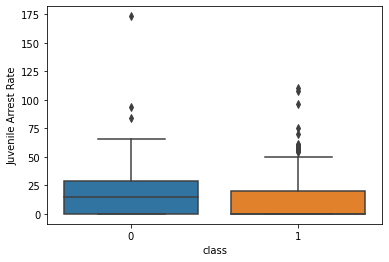

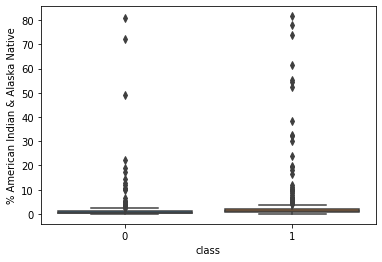

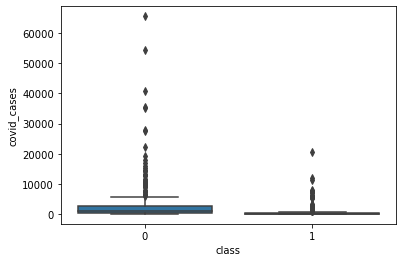

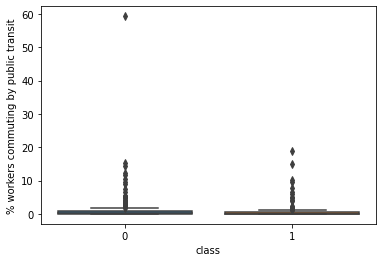

In [22]:
data1=c4[c4['class']==1]
data1_bar=c4[c4['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c42=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c42['class'].value_counts())


X=c42.drop(['class'],axis=1)
y=c42['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    51
0    51
Name: class, dtype: int64
Top features are

Deaths
% workers commuting by public transit
COPD Mortality Rate
non-White/White Segregation Index
% Veterans in Civilian Adult Population
% Disconnected Youth
Drug Overdose Mortality Rate
Violent Crime Rate
% Unemployed
opioid death rate


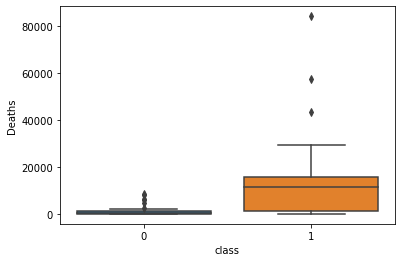

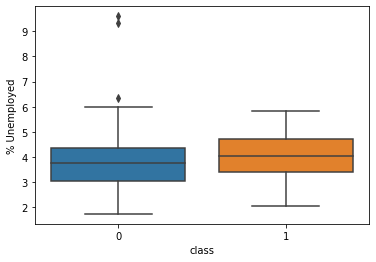

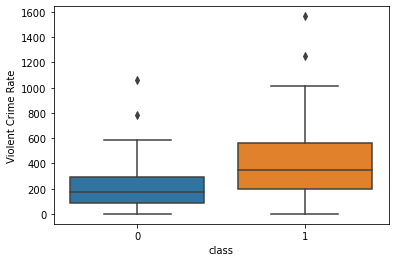

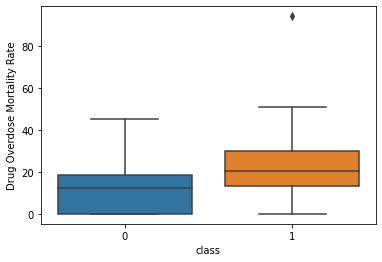

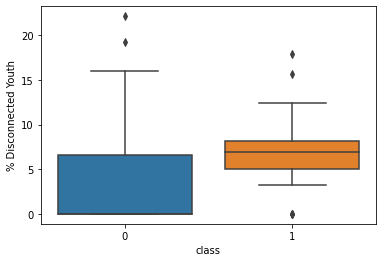

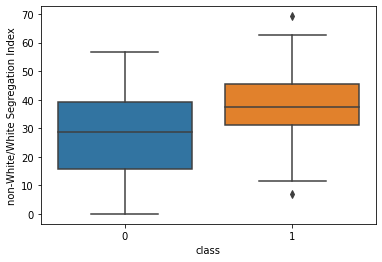

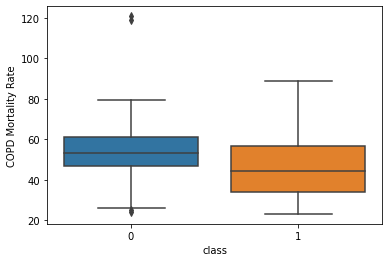

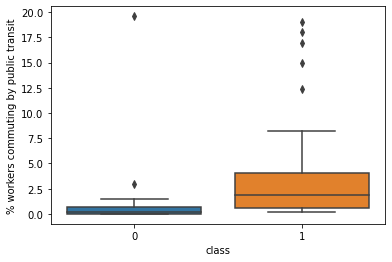

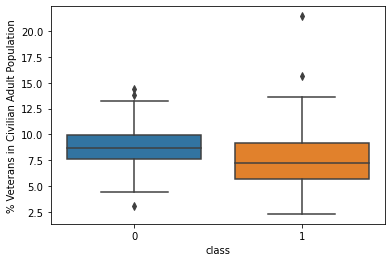

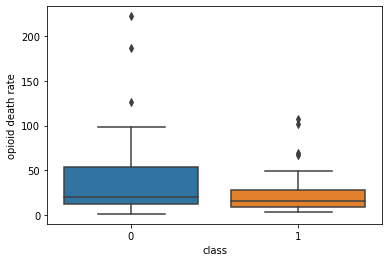

In [23]:
data1=c4[c4['class']==2]
data1_bar=c4[c4['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c43=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c43['class'].value_counts())

X=c43.drop(['class'],axis=1)
y=c43['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    1138
0    1138
Name: class, dtype: int64
Top features are

% American Indian & Alaska Native
Homicide Rate
% Vaccinated
Juvenile Arrest Rate
% Black
% Excessive Drinking
Drug Overdose Mortality Rate
% Children Uninsured
% Without Health Insurance
Years of Potential Life Lost Rate


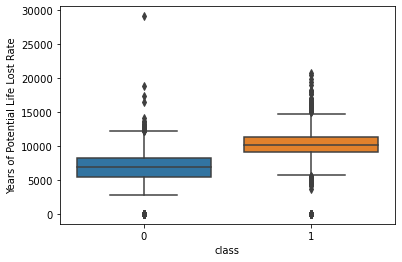

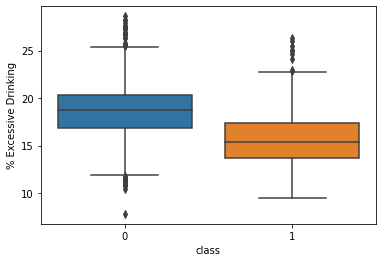

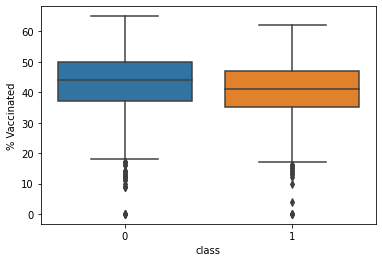

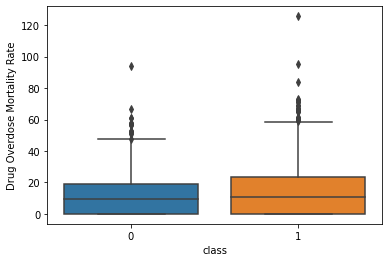

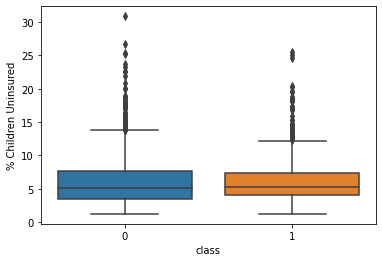

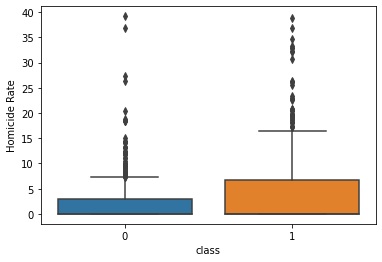

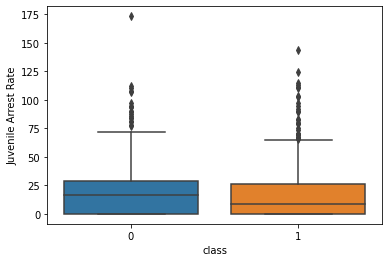

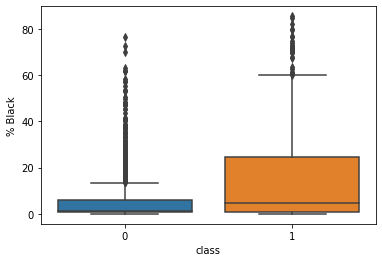

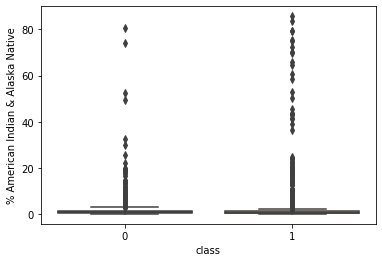

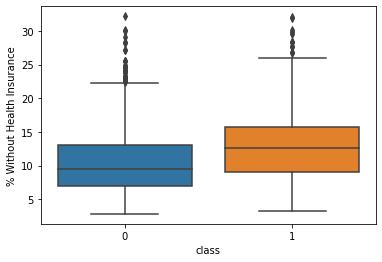

In [24]:
data1=c4[c4['class']==3]
data1_bar=c4[c4['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c44=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c44['class'].value_counts())

X=c44.drop(['class'],axis=1)
y=c44['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

# Clusters = 5


The number of entries per class are:
0    1648
3    1062
1     298
2     122
4       4
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


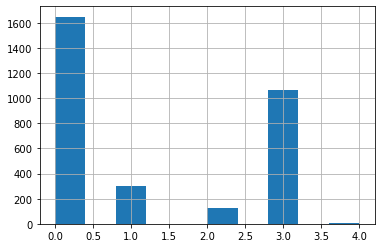

In [25]:
print("The number of entries per class are:\n{}".format(c5['class'].value_counts()),c5['class'].hist())

In [26]:
X1=c5.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c5['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c5[X1.columns[(selector.get_support())]]
print("Top features are\n")
for val in X_red.columns.to_list():
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
Average Number of Mentally Unhealthy Days
% Excessive Drinking
Average Daily PM2.5
HIV Prevalence Rate
Drug Overdose Mortality Rate
% Children Uninsured
Juvenile Arrest Rate
% Without Health Insurance


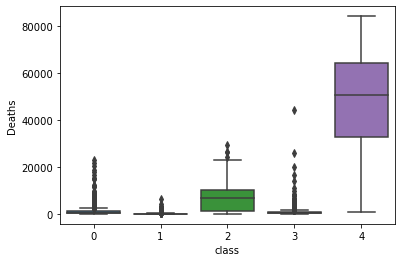

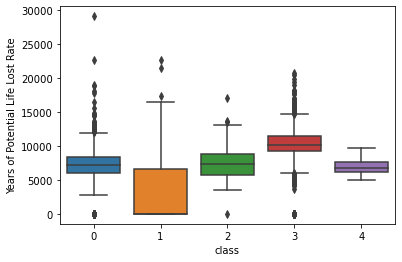

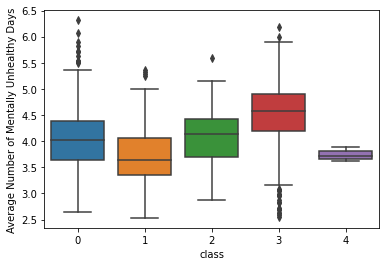

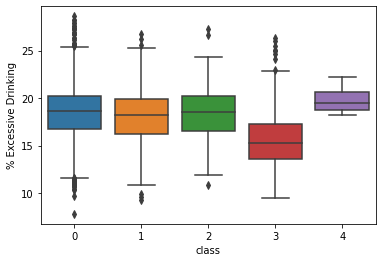

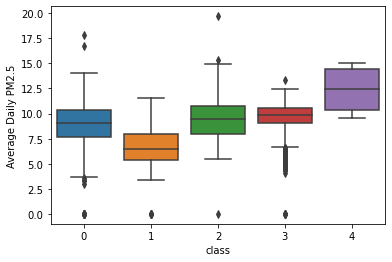

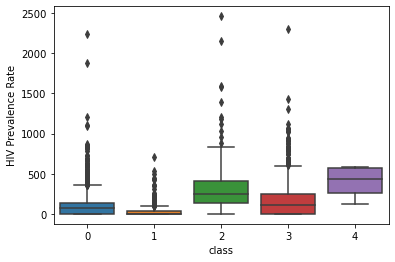

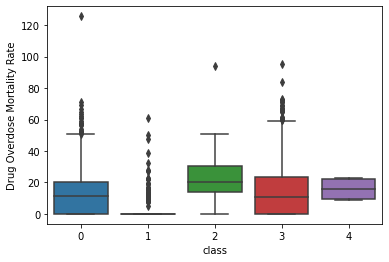

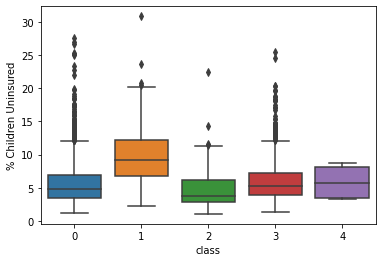

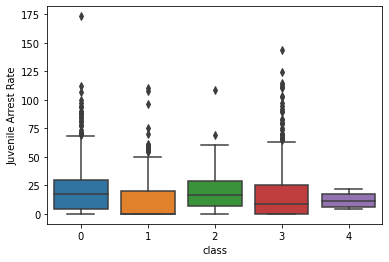

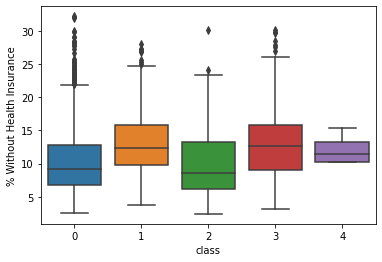

In [27]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

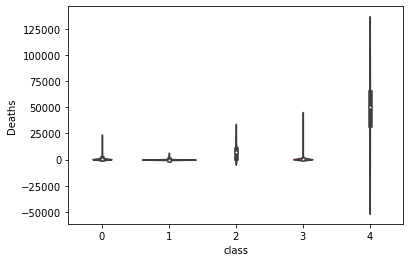

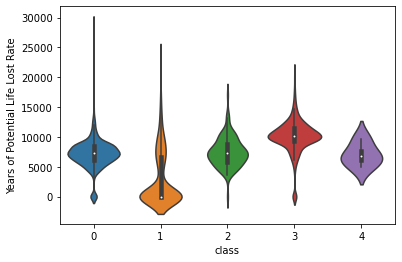

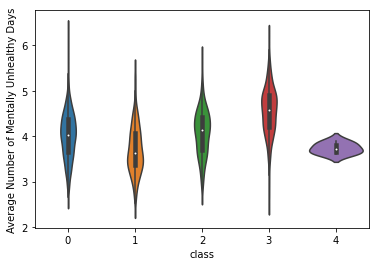

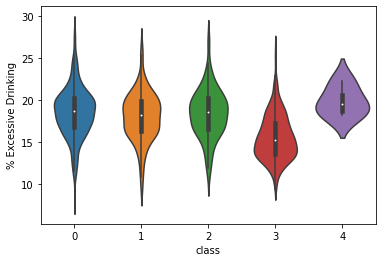

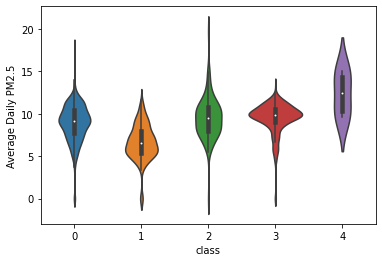

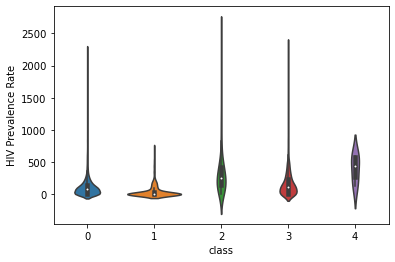

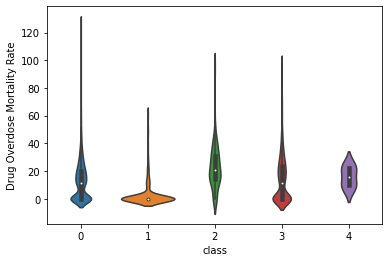

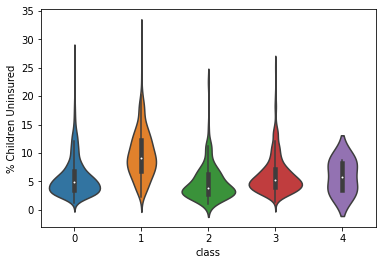

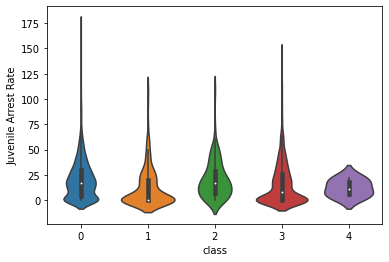

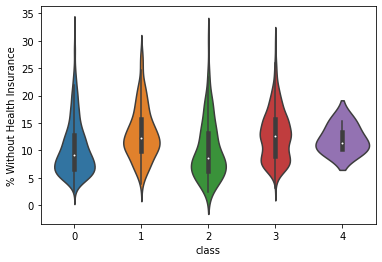

In [28]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1648
0    1486
Name: class, dtype: int64
Top features are

Deaths
Drug Overdose Mortality Rate
% Children Uninsured
Age-Adjusted Death Rate
Juvenile Arrest Rate
Population
% Excessive Drinking
Average Number of Mentally Unhealthy Days
% Without Health Insurance
Years of Potential Life Lost Rate


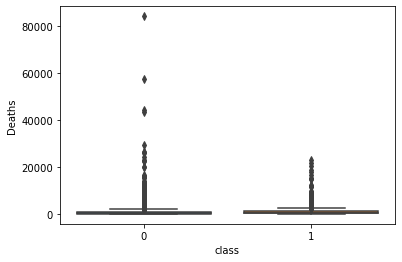

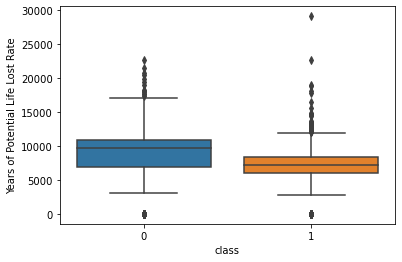

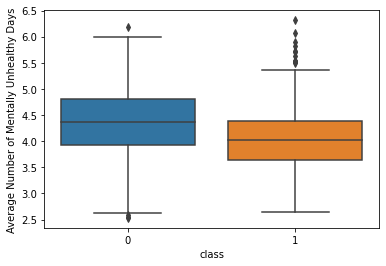

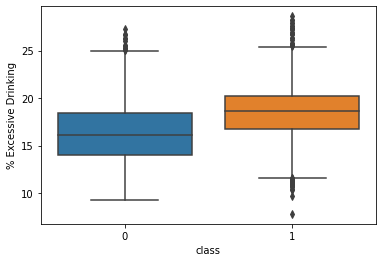

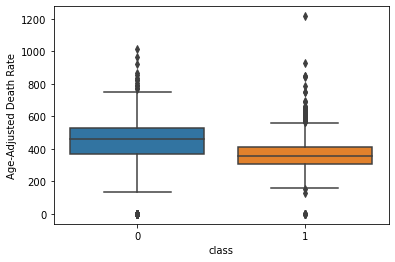

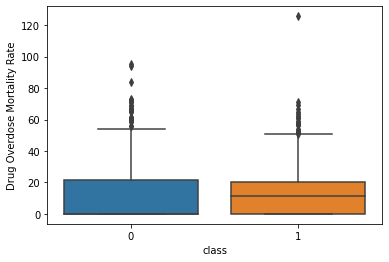

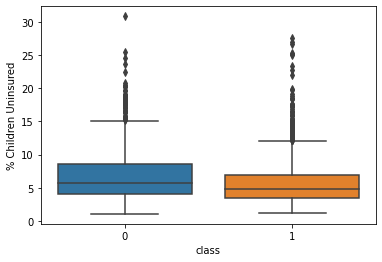

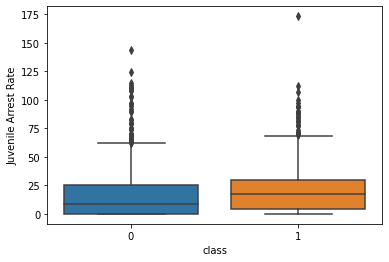

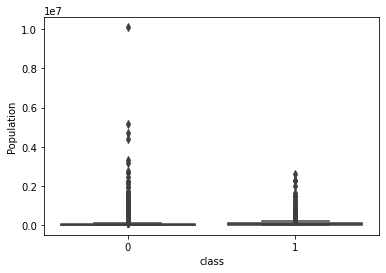

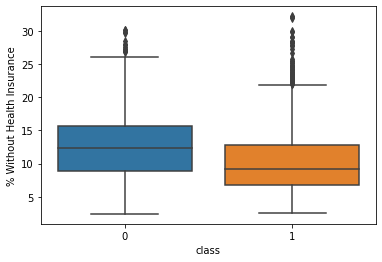

In [29]:
data1=c5[c5['class']==0]
data1_bar=c5[c5['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c51=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c51['class'].value_counts())

X=c51.drop(['class'],axis=1)
y=c51['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    298
0    298
Name: class, dtype: int64
Top features are

Deaths
Black/White Segregation Index
% Children Uninsured
% Insufficient Sleep
% Drive Alone to Work
Average Daily PM2.5
Income Ratio
opioid death rate
Years of Potential Life Lost Rate
Average Number of Mentally Unhealthy Days


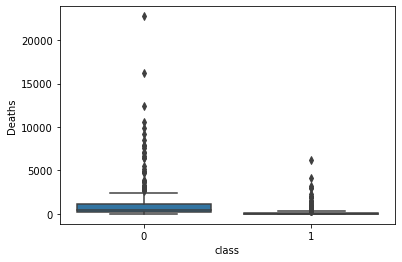

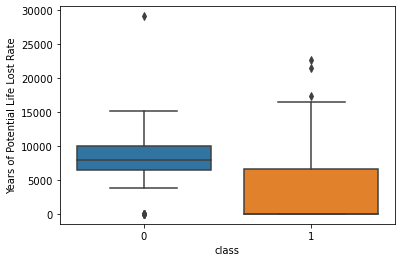

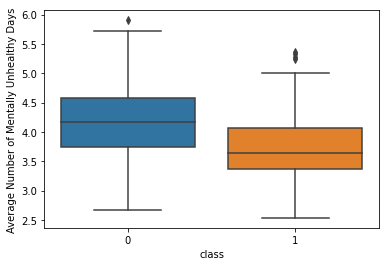

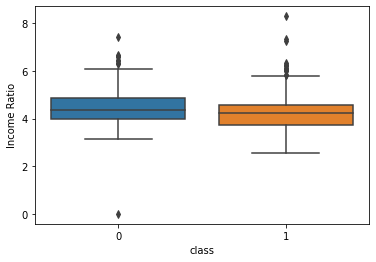

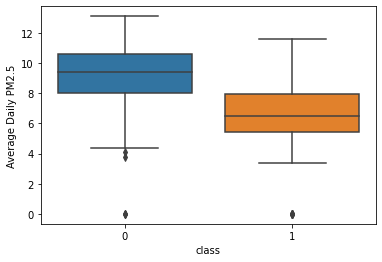

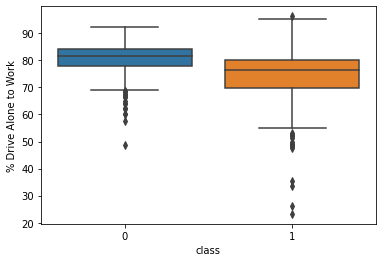

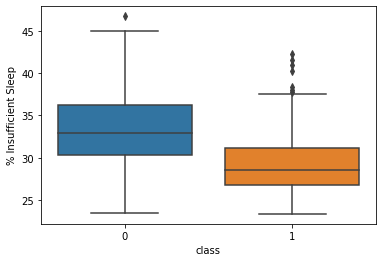

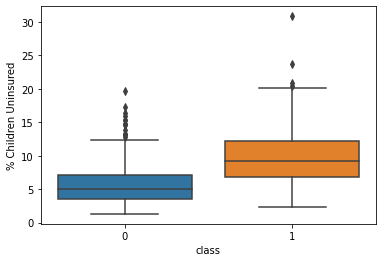

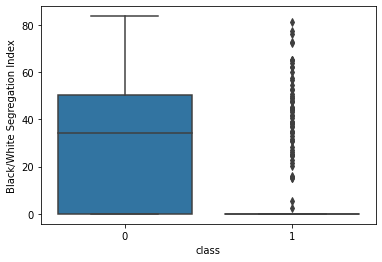

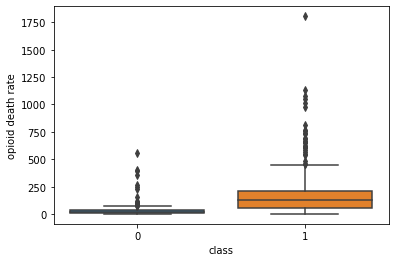

In [30]:
data1=c5[c5['class']==1]
data1_bar=c5[c5['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c52=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c52['class'].value_counts())

X=c52.drop(['class'],axis=1)
y=c52['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    122
0    122
Name: class, dtype: int64
Top features are

Deaths
covid_cases
% Homeowners
Firearm Fatalities Rate
% Disconnected Youth
% Insufficient Sleep
Drug Overdose Mortality Rate
% Severe Housing Problems
Income Ratio
Average Reading Performance


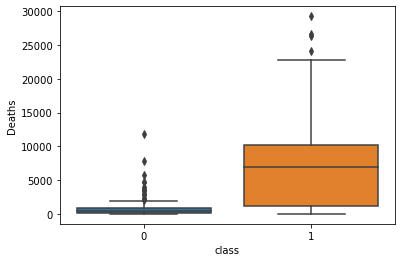

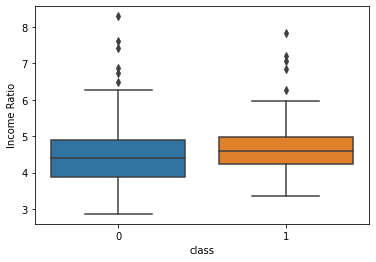

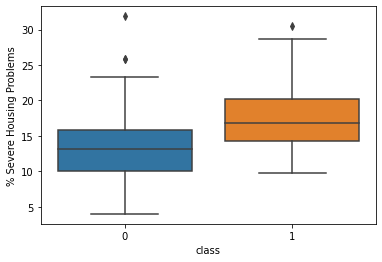

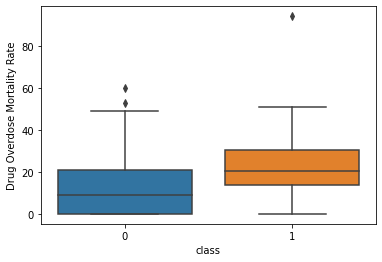

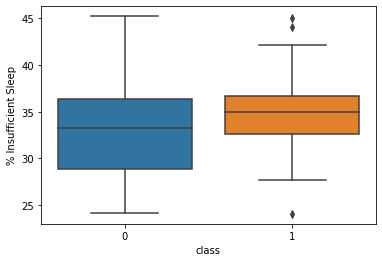

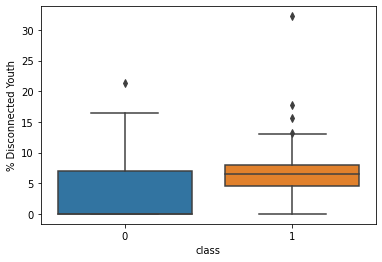

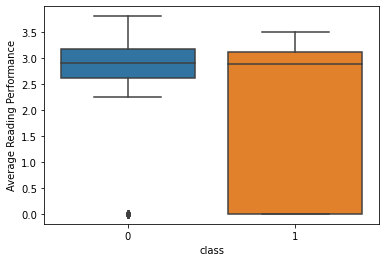

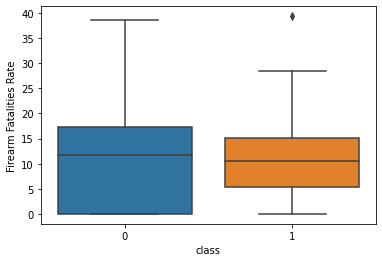

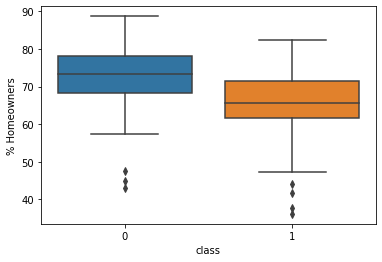

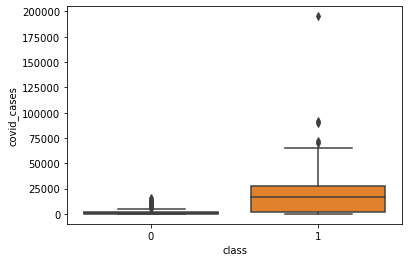

In [31]:
data1=c5[c5['class']==2]
data1_bar=c5[c5['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c53=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c53['class'].value_counts())

X=c53.drop(['class'],axis=1)
y=c53['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    1062
0    1062
Name: class, dtype: int64
Top features are

Deaths
Years of Potential Life Lost Rate
Drug Overdose Mortality Rate
Hypertension Death Rate
% Vaccinated
% Children Uninsured
% Excessive Drinking
% American Indian & Alaska Native
% Enrolled in Free or Reduced Lunch
Juvenile Arrest Rate


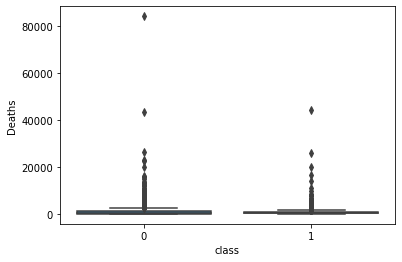

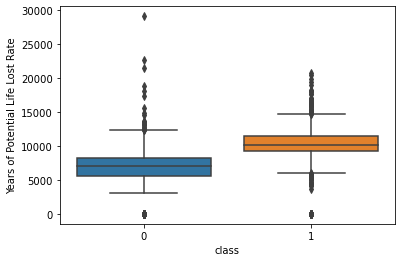

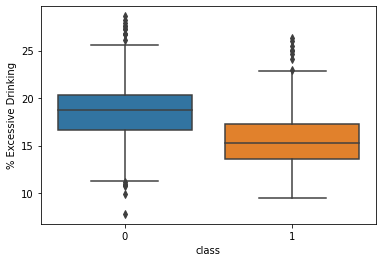

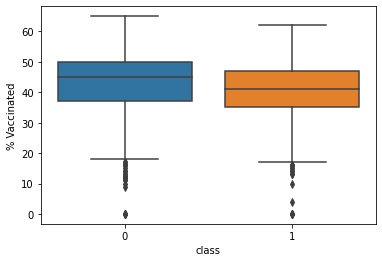

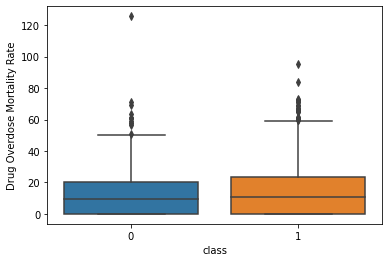

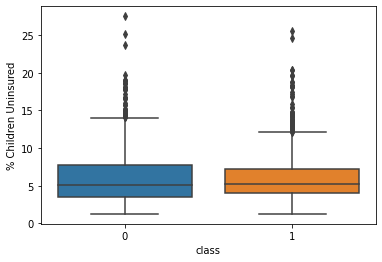

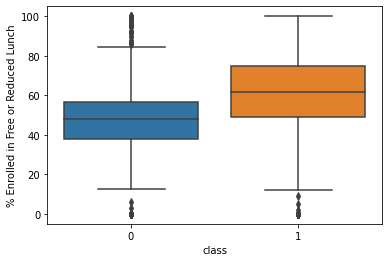

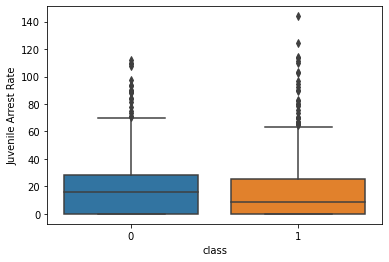

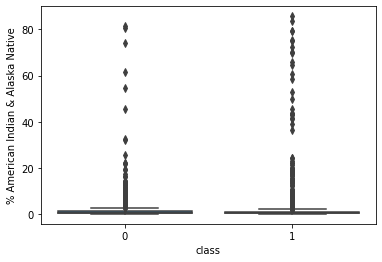

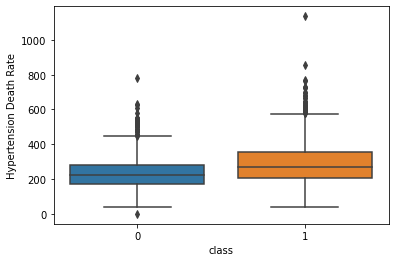

In [32]:
data1=c5[c5['class']==3]
data1_bar=c5[c5['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c54=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c54['class'].value_counts())

X=c54.drop(['class'],axis=1)
y=c54['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 5th cluster

Top features are

opioid death rate
Number of Hospitals
% disabled
% Without Health Insurance
% Veterans in Civilian Adult Population
% Excessive Drinking
% households wo car
% workers commuting by public transit
% Limited English Proficiency
Average Number of Physically Unhealthy Days


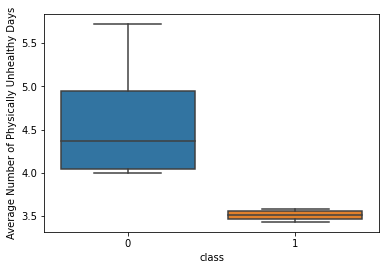

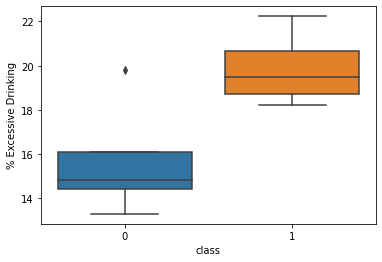

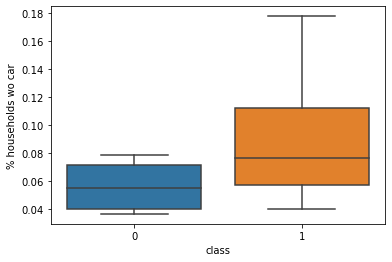

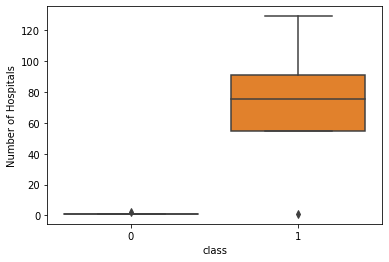

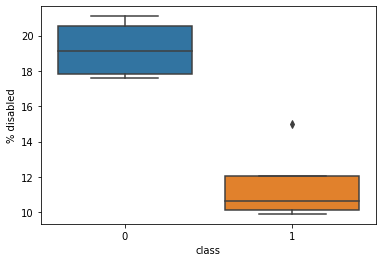

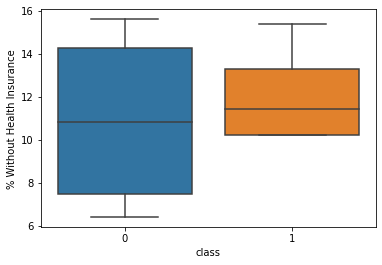

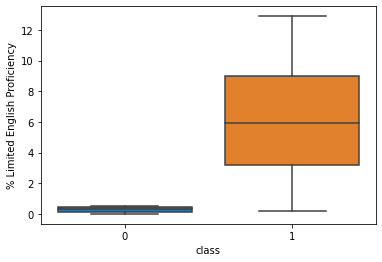

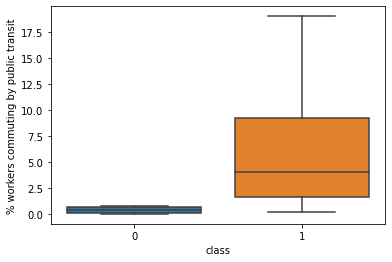

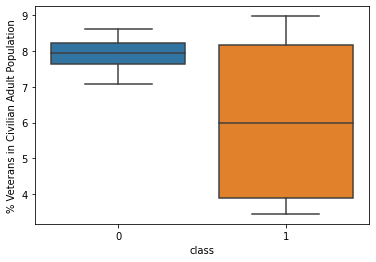

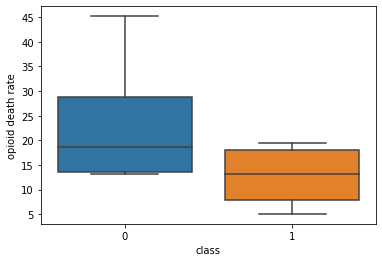

In [33]:
data1=c5[c5['class']==4]
data1_bar=c5[c5['class']!=4]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c54=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)



X=c54.drop(['class'],axis=1)
y=c54['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c5[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)

for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
# print(c54['class'].value_counts())
# print("No modelling required as only 3 features")

# Clusters = 6


The number of entries per class are:
1    1586
0    1054
3     298
4     165
5      27
2       4
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


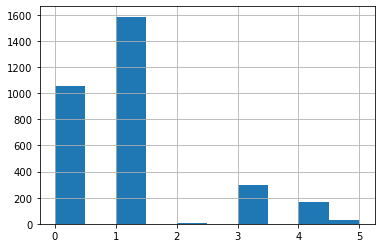

In [34]:
print("The number of entries per class are:\n{}".format(c6['class'].value_counts()),c6['class'].hist())

In [35]:
X1=c6.drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode","class"],axis=1)
y1=c6['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c6[X1.columns[(selector.get_support())]]
print("Top features are\n")
for val in X_red.columns.to_list():
    print(val)

Top features are

Deaths
Years of Potential Life Lost Rate
Average Number of Mentally Unhealthy Days
% Excessive Drinking
Average Daily PM2.5
HIV Prevalence Rate
Drug Overdose Mortality Rate
% Insufficient Sleep
% Children Uninsured
Juvenile Arrest Rate


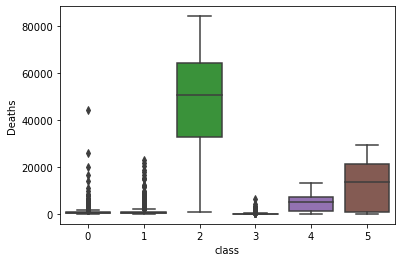

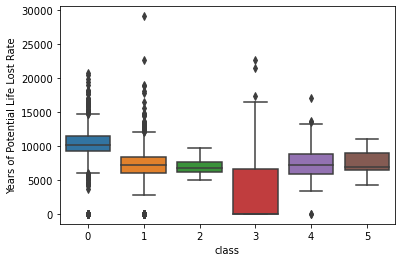

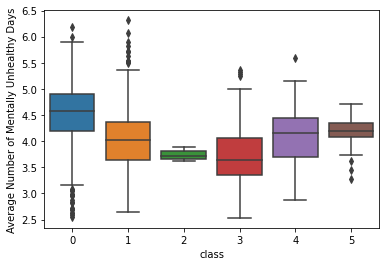

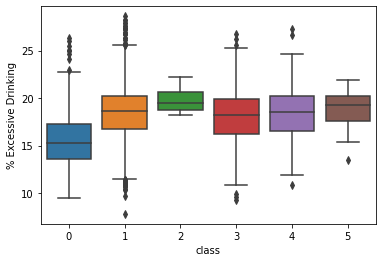

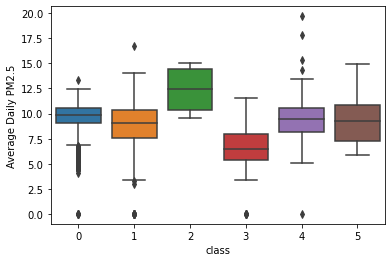

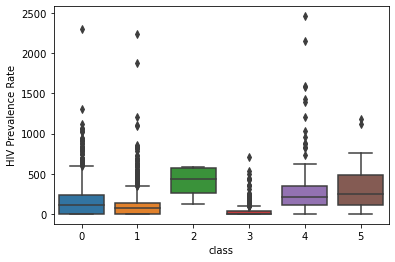

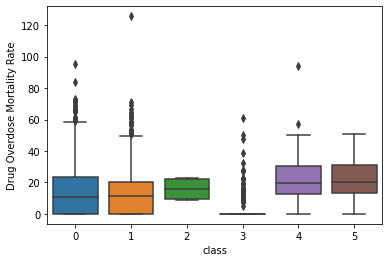

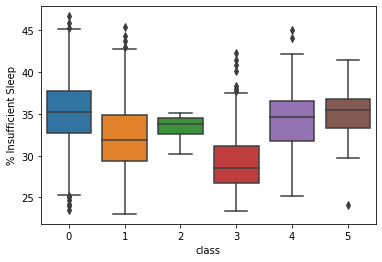

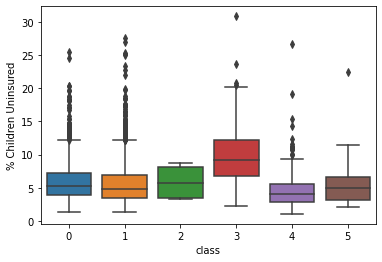

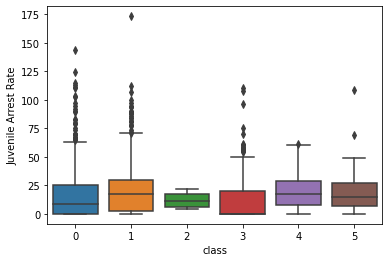

In [36]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

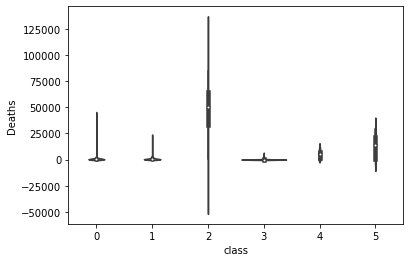

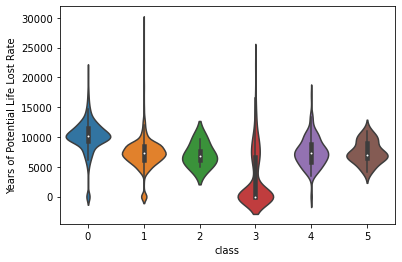

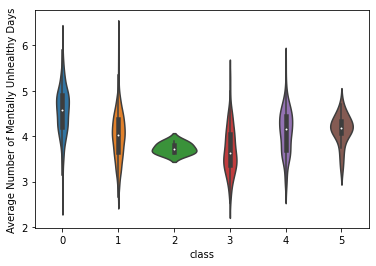

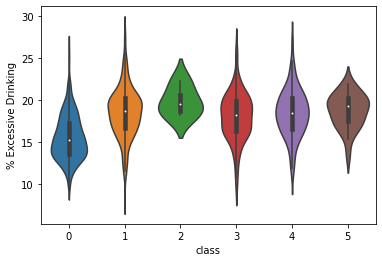

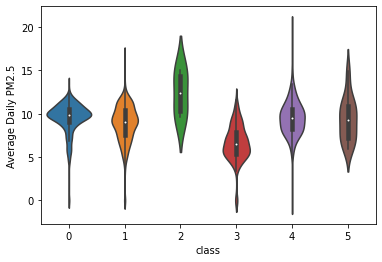

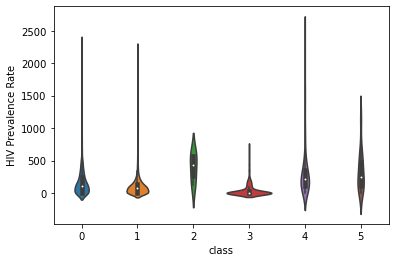

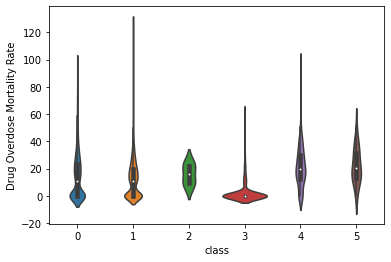

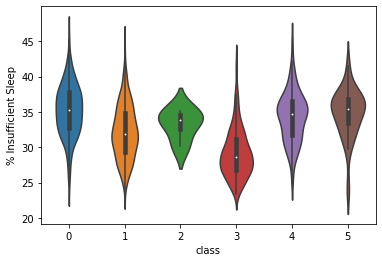

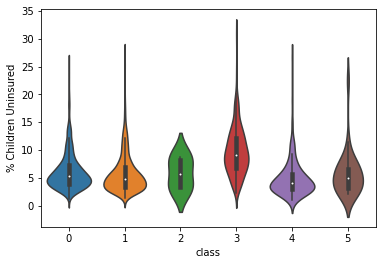

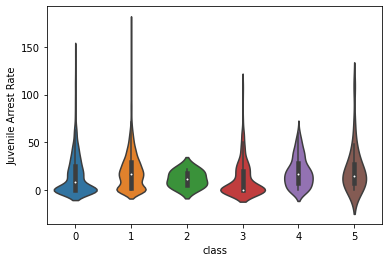

In [37]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1054
0    1054
Name: class, dtype: int64
Top features are

covid_cases
Drug Overdose Mortality Rate
% Hispanic
% Excessive Drinking
% Nonwhite
% Children Uninsured
Average Number of Mentally Unhealthy Days
Average Daily PM2.5
Years of Potential Life Lost Rate
% Without Health Insurance


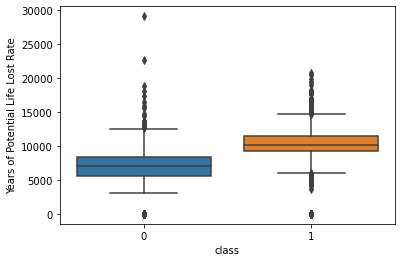

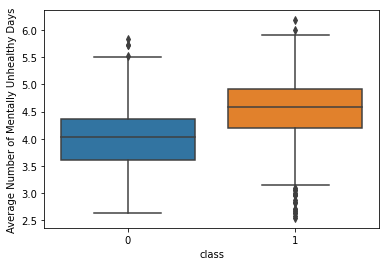

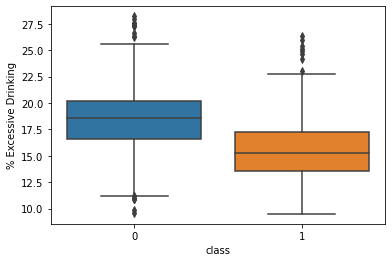

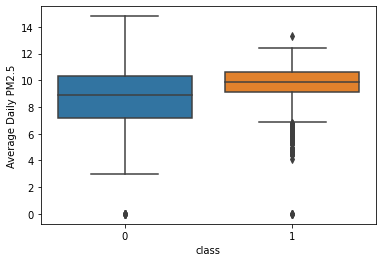

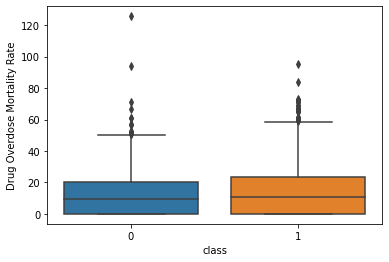

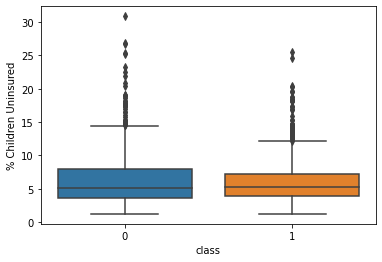

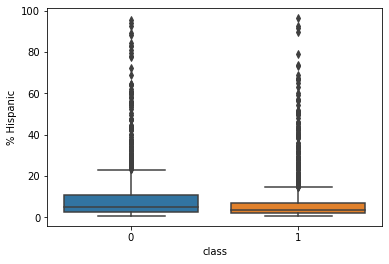

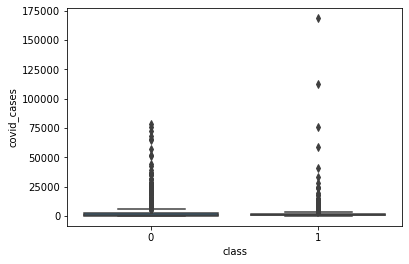

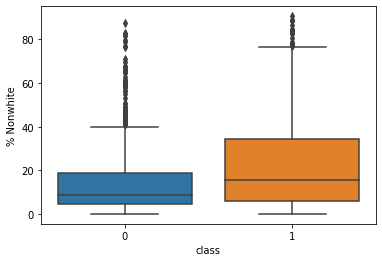

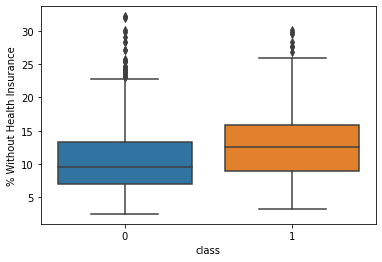

In [38]:
data1=c6[c6['class']==0]
data1_bar=c6[c6['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c61=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c61['class'].value_counts())

X=c61.drop(['class'],axis=1)
y=c61['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1586
0    1548
Name: class, dtype: int64
Top features are

Deaths
Drug Overdose Mortality Rate
% Children Uninsured
Average Math Performance
High School Graduation Rate
Child Mortality Rate
% Excessive Drinking
Juvenile Arrest Rate
Years of Potential Life Lost Rate
Average Number of Mentally Unhealthy Days


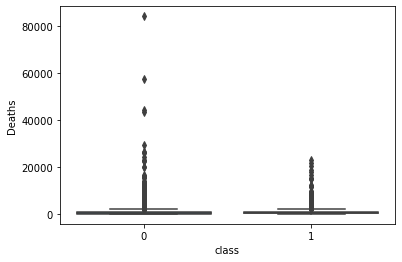

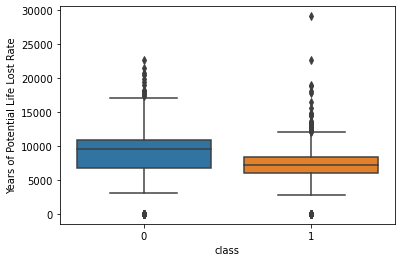

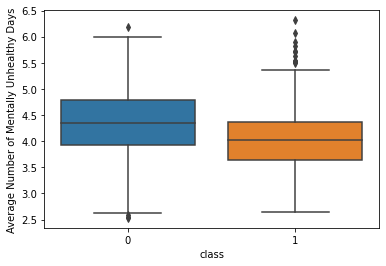

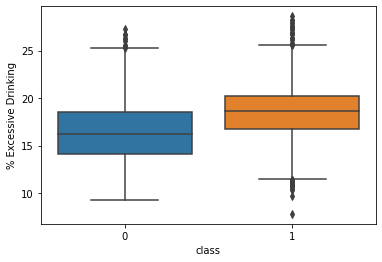

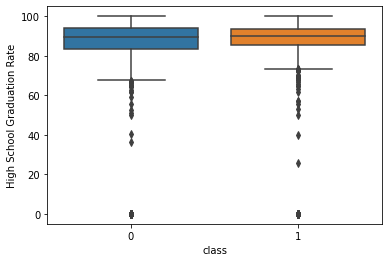

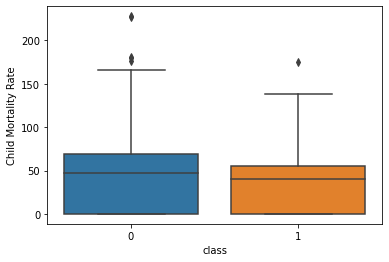

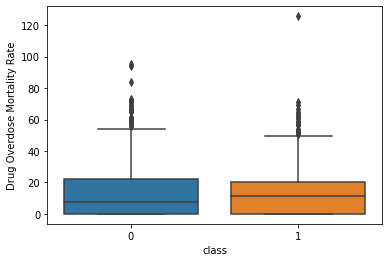

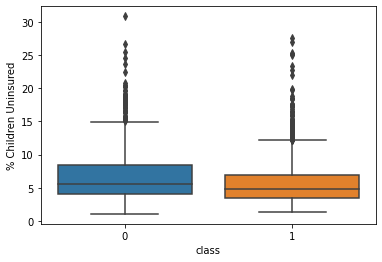

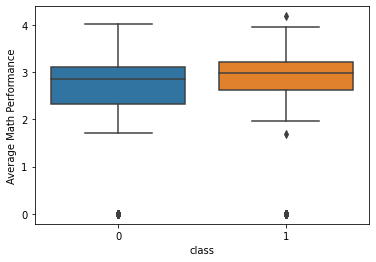

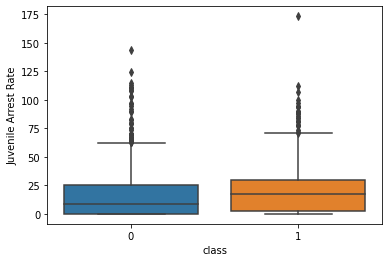

In [39]:
data1=c6[c6['class']==1]
data1_bar=c6[c6['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c62=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c62['class'].value_counts())

X=c62.drop(['class'],axis=1)
y=c62['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 3rd cluster

1    4
0    4
Name: class, dtype: int64
Top features are

opioid death rate
Teen Birth Rate
% households wo car
% Smokers
Number of Hospitals
% Veterans in Civilian Adult Population
% Without Health Insurance
% disabled
% workers commuting by public transit
% Limited English Proficiency


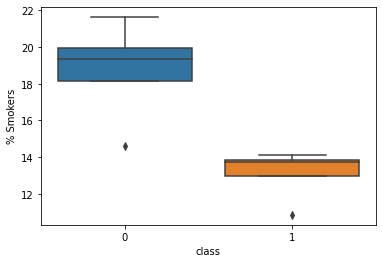

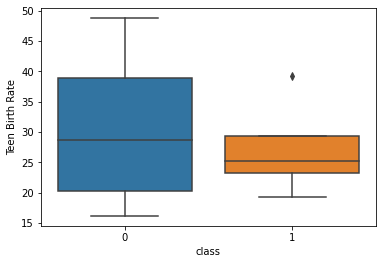

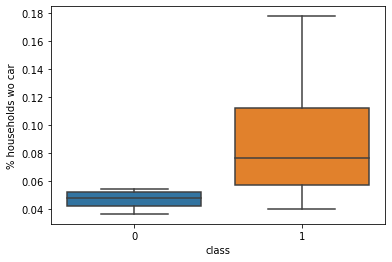

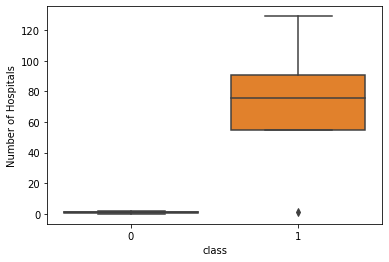

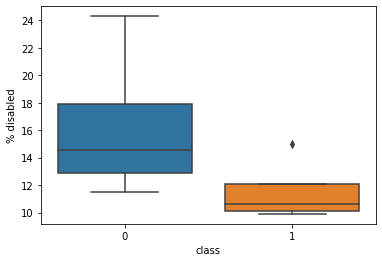

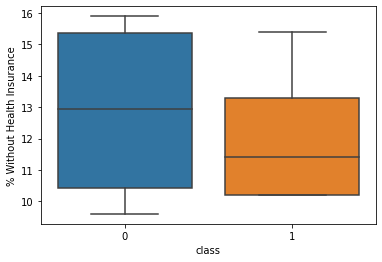

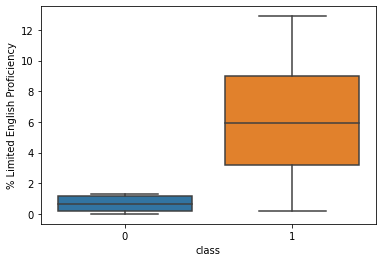

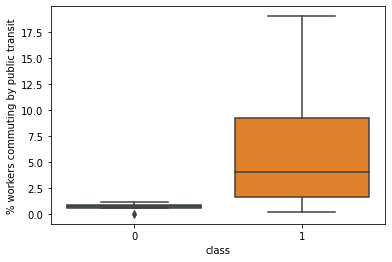

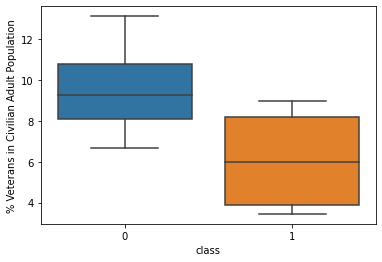

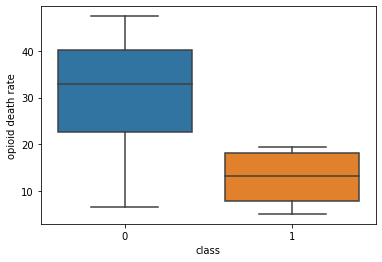

In [40]:
data1=c6[c6['class']==2]
data1_bar=c6[c6['class']!=2]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c63=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c63['class'].value_counts())

X=c63.drop(['class'],axis=1)
y=c63['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 4th cluster

1    298
0    298
Name: class, dtype: int64
Top features are

Deaths
% American Indian & Alaska Native
Population
% Enrolled in Free or Reduced Lunch
Average Math Performance
% Children Uninsured
Average Daily PM2.5
Teen Birth Rate
opioid death rate
Years of Potential Life Lost Rate


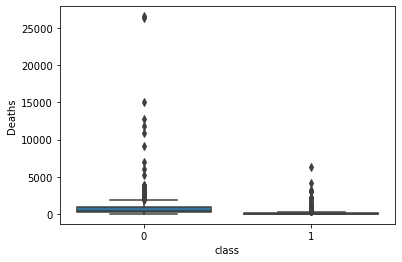

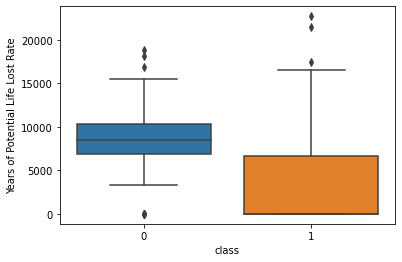

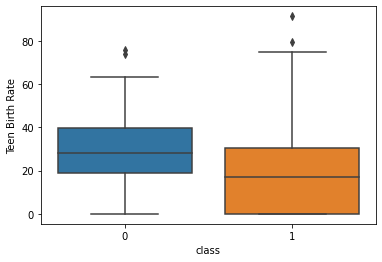

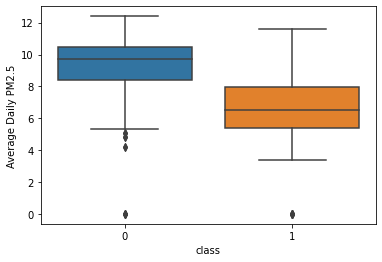

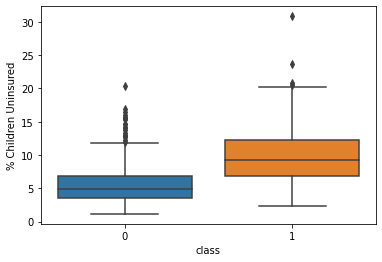

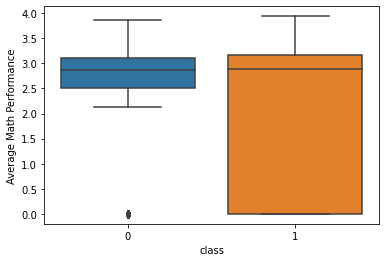

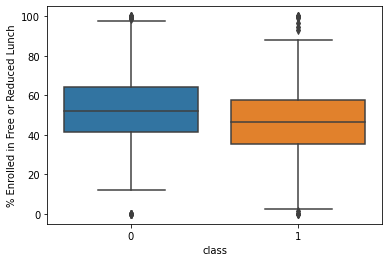

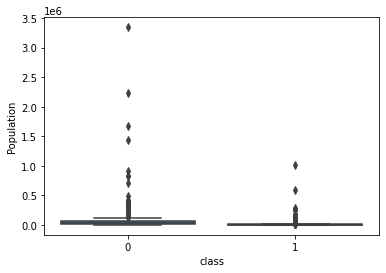

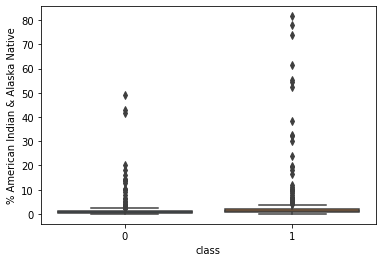

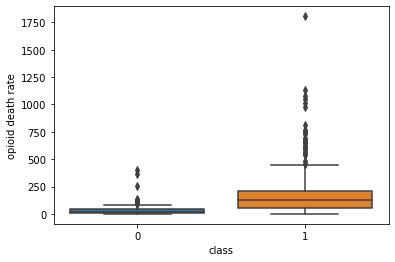

In [41]:
data1=c6[c6['class']==3]
data1_bar=c6[c6['class']!=3]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c64=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)

print(c64['class'].value_counts())

X=c64.drop(['class'],axis=1)
y=c64['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 5th cluster

1    165
0    165
Name: class, dtype: int64
Top features are

Deaths
Dentist Rate
% Unemployed
internet_ratio
Heart Disease Death Rate
internet_hhs
% Physically Inactive
% Homeowners
% Insufficient Sleep
% Vaccinated


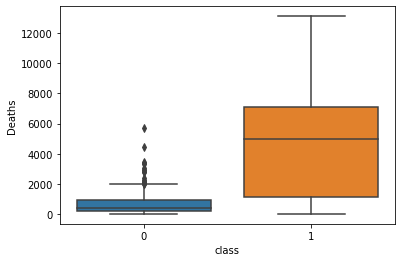

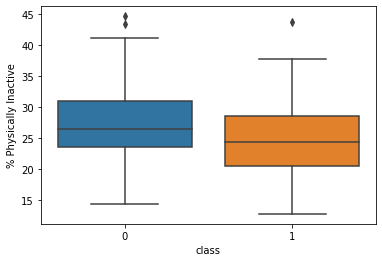

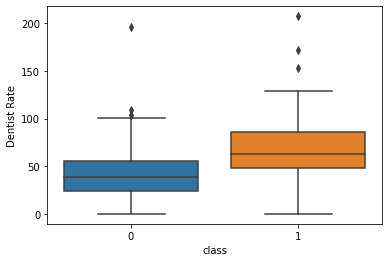

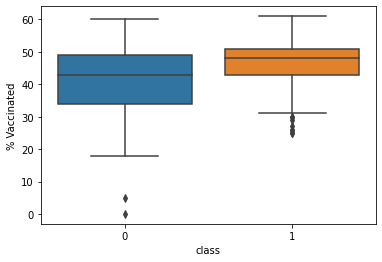

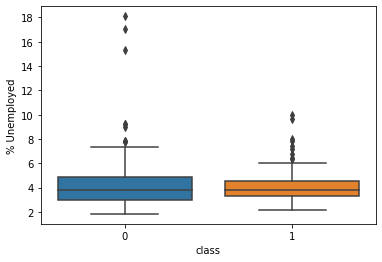

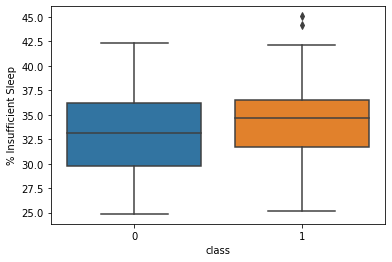

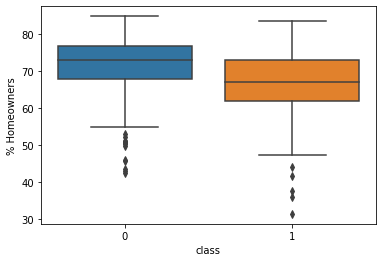

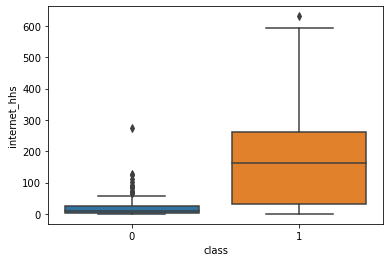

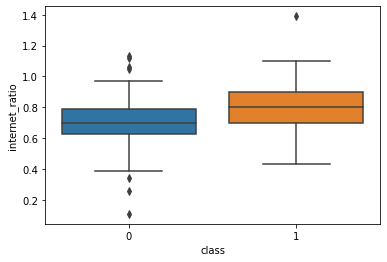

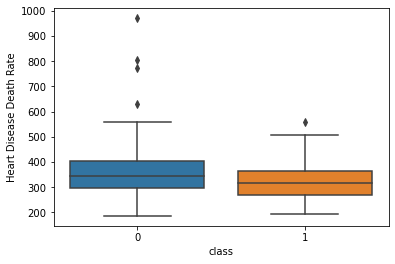

In [42]:
data1=c6[c6['class']==4]
data1_bar=c6[c6['class']!=4]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c65=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c65['class'].value_counts())

X=c65.drop(['class'],axis=1)
y=c65['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c6[X.columns[(selector.get_support())]]
print("Top features are\n")
for val in X.columns[selector.ranking_.argsort()][:10].to_list():
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

## 6th cluster

In [44]:
data1=c6[c6['class']==5]
data1_bar=c6[c6['class']!=5]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c66=pd.concat([data1,d],ignore_index=True).drop(columns=["FIPS","State","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)
print(c66['class'].value_counts())
print("only 27 data points so no modelling required")

1    27
0    27
Name: class, dtype: int64
only 27 data points so no modelling required
